<img src="./pics/ajay-tech-logo.png"/> <br>Notebook is copyright &copy; of [Ajay Tech](https://ajaytech.co). For an online version of this notebook, visit [Regression with R](https://ajaytech.co/regression-in-r)

<hr>

# [Regression](https://ajaytech.co/regression-in-r)

> <b>Summary</b> : Regression is a basic Machine Learning Technique. We will be learning Simple Linear Regression, Multiple Linear Regression and Polynomial Regression in this section. On top of the basic technique itself, we will also be covering many statistical concepts (like _Null Hypothesis_, _p-value_, _r-<sup>2</sup>_, _RMSE_ ) and other key concepts in machine learning like _Feature Selection_, _Training and Test data splits_ that will be useful in evaluating models going forward as well. 

<hr>

## Contents

- [What is Regression](#What-is-Regression)
- [Why Regression](#Why-Regression)
- [Solve a Regression problem in Python](#Solve-Regression-in-Python)
- [Simple Linear Regression](#Simple-Linear-Regression)
  - [How did we get the straight line ( fit )](#How-did-LinearRegression-fit-the-straight-line)
  - [Residuals](#Residuals)
  - [Sum of Squares](#Sum-of-Squares)
- [Multilinear Regression](#Multilinear-Regression)
  - [Boston Housing dataset](#Boston-Housing-dataset)
  - [Reponse Variable vs Predictor](#Response-Variable-vs-Predictor)
- [Correlation](#Correlation)
- [p value](#p-value)
  - [Null Hypothesis](#Null-Hypothesis)
  - [Optimum p-value](#Optimum-p-value)
- [Key Parameters](#Key-Parameters)
  - [r-squared - r2](#r-squared-r2)
    - [How is r2 calculated](#How-is-r2-calculated)
  - [r-squared adjusted](#r-squared-adjusted)
  - [RMSE - Root Mean Square error](#RMSE-Root-Mean-Square-error )
- [Feature Selection](#Feature-Selection)
  - [Stepwise Regression](#Stepwise-Regression)
    - [Backward Elimination](#Backward-Elimination)
- [Accuracy of the model](#Accuracy-of-the-model)
  - [Training & Test datasets](#Training-and-Test-datasets)
- [Polynomial Regression](#Polynomial-Regression)
- [Overfitting](#Overfitting)
  - [Detect Overfitting](#Detect-Overfitting)
  - [Prevent Overfitting](#Prevent-Overfitting)
- [Linear Regression Assumptions](#Linear-Regression-Assumptions)
  - [Homoskedasticity](#Homoskedasticity)
  - [Normal Distribution of Residuals](#Normal-Distribution-of-Residuals)
  - [No Multicollinearity](#No-Multicollinearity)
- [Challenges](#Challenges)


<hr>

### What is Regression

In Machine Learning, most problems are classified as supervised vs unsupervised learning. We will first focus on supervised learning algorithms and later work on unsupervised learning algorithms. Supervised learning is once again split into the following 2 groups
- Classification
- Regression

Given a particular height and weight, classify the person as either male or female. This is an example of classification. You are essentially trying to **classify** the person - in this case - as male or female based on certain characteristics.

In contrast, say you are trying to predict the body fat percentage based on height and weight - this is an example of a regression problem. What is the difference ? Body Fat % is a continuous variable - say it starts at a minimum of 2% (really lean) and can go all the way up to 50 % say (extremely obese) - as opposed to a categorical variable in the example above ( Male or Female ).

<hr>

### Why Regression

If you are learning how to solve a regression problem for the first time, you probably need to understand why you need regression to start with. This is probably the simplest of the regression problems. Let's start with a simple data set - Swedish auto insurance claims. You can google it or get it from [kaggle](https://www.kaggle.com/sunmarkil/auto-insurance-in-sweden-small-dataset). It is a very small data set with just 2 variables -
- Number of Claims
- Total payment for these claims ( in thousands )

<img src="./pics/swedish_auto_claims.png"/>

Claims come first and the settlement happens much later. Assuming these are claims this company receives per week, is there a way we can predict how much the company will end up paying, just based on the number of claims ?

**What value does this bring to the company ?**

Being able to predict the payment based on the number of claims gives a very good understanding of the companies expenses very much in advance.

**Why do you need machine learning for this problem ?**

Each claims is different - A fender bender claims costs a thousand dollars and a total could cost 20 grand. The type of claim does make for a good predictor, but let's just assume we don't have that at this point. Even if we had the type of claim, a fender bender can cost anywhere from 300 to 2000 dollars based on the severity of damage, the arbitration and several environmental factors. Essentially, there is no easy way to correlate the claims to the payment. If we tried to do this using some kind of IF, THEN logic, we would be going around in hoops.

<hr>

### Solve Regression in Python

In [58]:
data = read.csv("./data/insurance.csv", skip= 5, header=TRUE)
head(data)

,claims,payment
,<int>,<dbl>
1,108,392.5
2,19,46.2
3,13,15.7
4,124,422.2
5,40,119.4
6,57,170.9


Looking OK - but since we are reading data from file, we have to ensure that Python is not reading integers as strings or other object types. Let's quickly verify if the data types are correct. 

In [15]:
class(data$claims)

[1] "integer"

In [16]:
class(data$payment)

[1] "numeric"

Looking good. Now, onto LinearRegression. We don't have to install any specific packages to do linear regression in R. As part of base R, we have a function called **lm ( )**. 

In [59]:
model = lm( payment ~ claims, data = data)

Our model is ready. Let's start predicting *claims* based on the *count* of claims. We will be using the **predict** method. But before we do that, let's plot this out to understand what we have done so far. 

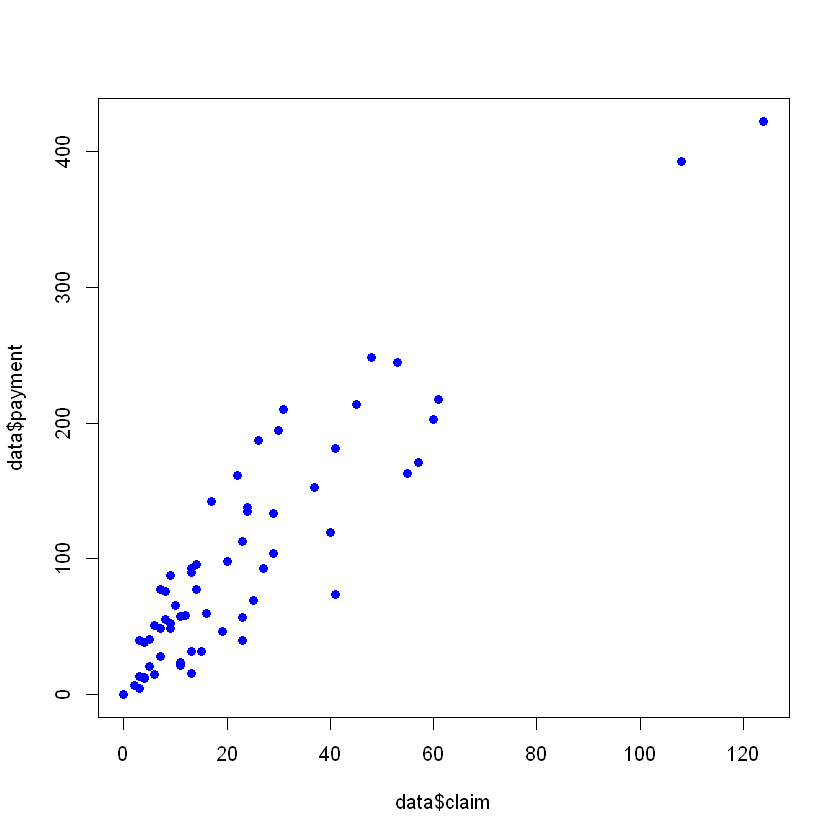

In [60]:
# pch stands for plotting characteristics. 
# A value of 19 means that it is a solid dot (as opposed to a default hollow dot)
plot( data$claim,data$payment,pch = 19, col = "blue")

In [61]:
predict = predict(model, data = data[,1])

Linear Regression has already solve this problem for us - we just didn't realize it yet. The parameters ( also called co-efficients )

- slope
- intercept  

are the solution. 

In [62]:
intercept = coef(model)[1]
slope     = coef(model)[2]

cat ("slope = ", slope, "\n")
cat ("intercept = ", intercept)

slope =  3.413824 
intercept =  19.99449

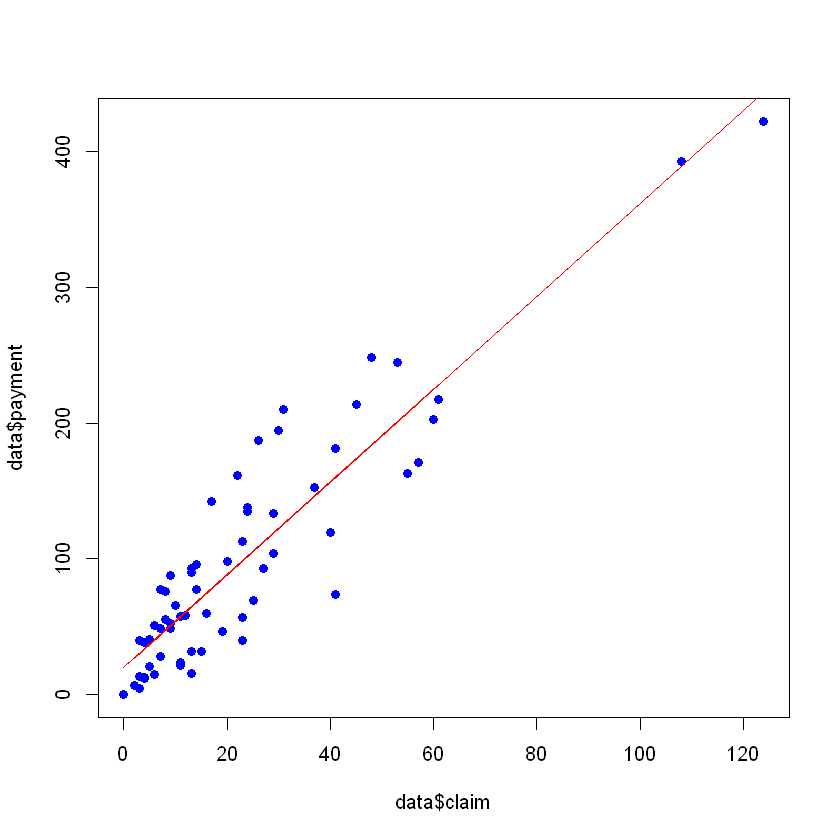

In [63]:
plot( data$claim,data$payment,pch = 19, col = "blue")
lines(data$claim, fitted(model), col="red")

In case you are wondering how this line was draw, you can very well use the slope and intercept parameters to draw the same line. 

How did we get the straight line ?

<img src="./pics/y_mx_b.png"/>

A straight line can be defined mathematically using

# $ y = ax + b$

where
- a = slope
- b = intercept

These are also called coefficients. The **fit** function of _LinearRegression_ has already arrived at these numbers ( slope and intercept ). It has done so based on the data

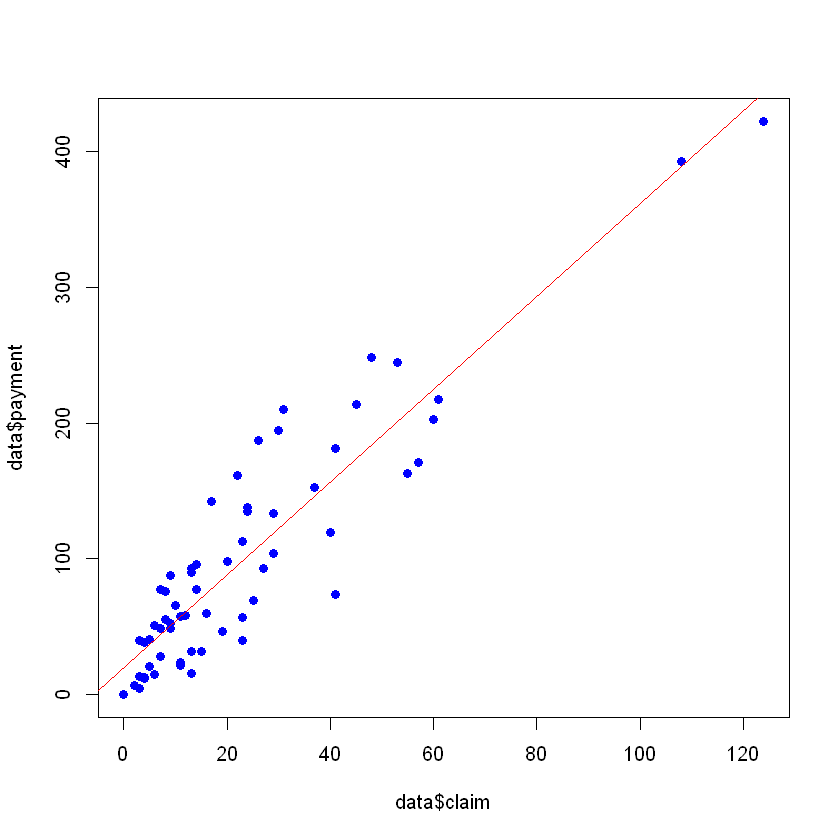

In [64]:
plot( data$claim,data$payment,pch = 19, col = "blue")

# abline defines the equation as "y = bx + a" as opposed to our definition as "y = ax + b"
# that is why, we are setting a = intercept and b = slope in the equation.
abline(a=intercept, b=slope, col = "red")

<hr>

#### What did we achieve ?

What we have essentially done is predicted a relationship between the number of claims and the total amount paid. For example, what is the total amount expected to be paid when the number of claims is 80 ?

<img src="./pics/predict_claims_value.png"/>

Easy, right ?

<hr>

#### Prediction

We don't have to draw lines like this every time to predict the value of Y for a value of X. You can use the **predict ( )** function. Let's first predict all the original claim values.

In [65]:
pred = predict(model, newdata = data.frame(claims=data$claims))
head(pred)

1         2         3         4         5         6 
388.68743  84.85713  64.37419 443.30861 156.54743 214.58243

You don't have to predict all the original values. Normally, we do a train/test split (which, we will see later) and try to predict the accuracy based on the test dataset. However, we can throw any predictor (claims in this case) value to see how the model predicts the payments for. For example, say we pick 5 different claim values (10,20,30,40,50) and want to find out what our model predicts. 

In [40]:
pred = predict(model, newdata = data.frame(claims=c(10,20,30,40,60)))
pred

1         2         3         4         5 
 54.13272  88.27096 122.40919 156.54743 224.82390

Alright, let's see how the predicted values compare against the actual values. 

What were the original values though ? You can pick them up from the CSV. 

<img src="./pics/insurance_claims_actual_values.png"/>

In [32]:
original_claim_values = c(65.3,98.1,194.5,119.4,202.4)

Let's also plot these to compare how well we predicted.

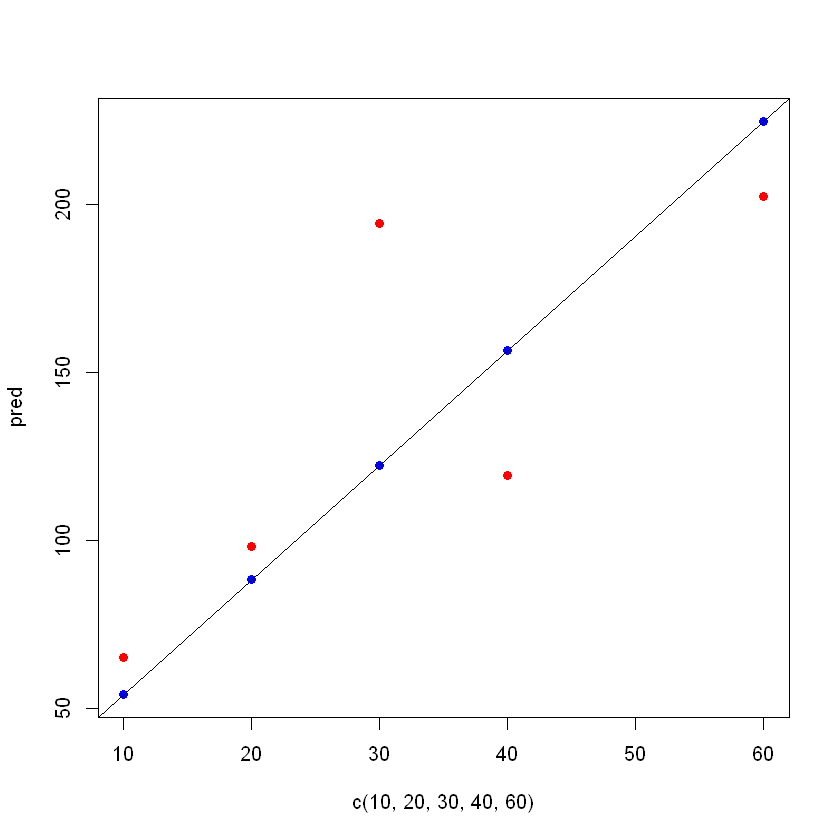

In [44]:
plot(c(10,20,30,40,60), pred ,pch=19, col="blue")
points(c(10,20,30,40,60),original_claim_values, pch=19, col="red"  )

# abline defines the equation as "y = bx + a" as opposed to our definition as "y = ax + b"
# that is why, we are setting a = intercept and b = slope in the equation.
abline(a=intercept, b=slope, col = "black")

Some values are pretty close, some are a bit off - but nevertheless its a good prediction for the amount of time we spent doing it. 

<hr>

## Simple Linear Regression 

What we have seen so far is an example of implementing **Simple Linear Regression** in R. What we will see in this section is the math behind it - Give it a try - if it gets tedious, please do a couple of re-reads. It is critical that you understand this section. 

### How did LinearRegression fit the straight line

The fun starts now. How did the **LinearRegression ( )** function fit the straight line ? How did it it arrive at this equation

# $ y = 3.4 x + 19.99$

Obviously, there is no one straight line that will pass through all the points in this case.

<img src="./pics/best_fit.png"/>

If you take these 4 data points, we can eyeball a straight line that goes through the middle of it. The ones marked with question marks are visually not a good fit at all. But the question that linear model tries to solve is,

> What is the **"Optimum"** straight line that best describes the relationship between X and Y

This is where statistics comes in.

<hr>

#### Let's zoom in

Let's simplify and make up some numbers ( for easy calculation) of claims vs payments. Say we have a set of 5 data points for claims vs payments and we wish to fit a linear model that can predict further data. This is a very small data set to do anything practical, but there is a reason why we are doing such a small data set as we will see in the coming sections.

|claims | payments (inthousands|
|-------|----------------------|
|20 | 40|
|40 | 60|
|60 | 80|
|80 | 80|
|100 | 90|

Let's plot these on a graph.

<img src="./pics/claims_vs_payments.jpg"/>

If we were asked to eyeball a straight line that best fits these data points, this is how we would do it.

<img src="./pics/approximate_line.png"/>

How did we do it ? Our eye is essentially trying to **minimize the distances** from each of these points to the straight line. The best fitting straight line is one which minimizes the distances for all these points.

Linear regression in machine learning does exactly that - Instead of a human eye, machine learning takes the help of statistics to do this approximation. There are a couple of methods to do this in statistics.

- Ordinary Least Squares
- Gradient Descent

Let's explore the first method here.

<hr>

#### Residuals

When we tried to minimize the distance of each of these points from the line we are trying to fit, the distances between the points and the straight line ( on the y axis ) are called **residuals**.

<img src="./pics/residuals.png"/>

<hr>

#### Sum of Squares

**Warning - Geeky Statistics stuff**

To arrive at the best fit values for the straight line, statisticians have arrived at the following formula based on the method of least squares. How they arrived at it is pretty geeky and let's leave that to the statisticians.

<img src="./pics/equation.png"/>

This equation sounds scary, but it is not. I am going to prove it to you in a minute down below. There are 2 things in this equation that require an explanation.

- The weird symbol that looks like a knocked up W . It is used for summation.
- y with a bar on it ( or x with a bar ). The bar just represents the average. So y with a bar on it represents the average.

Let's take the same numbers that we have above and try to calculate the formula by hand. Excel would make things easy, but let's just do it manually, since the numbers are not all that bad.

<img src="./pics/b_calculation.png"/>

### slope = $\frac{2400}{4000} = 0.6$
### intercept = $Y_{avg} - b \times X_{mult}$ = 70 - 0.6 x 60 = 34

That was huge - Now we can easily calculate a and b from the Y = a + b X equation. The convention for slope and intercept here is different from what we referred to previously. You can stick to one convention and use it. However, you might see multiple variations of this (like Y = mx + b for example). 

**Validation**

Let's cross validate this equation.

In [48]:
sample = data.frame( x=c(20,40,60,80,100),y = c(40,60,80,80,90))

In [49]:
sample

x,y
<dbl>,<dbl>
20,40
40,60
60,80
80,80
100,90


Let's model this data and plot it

In [50]:
model = lm(y~x, data = sample)

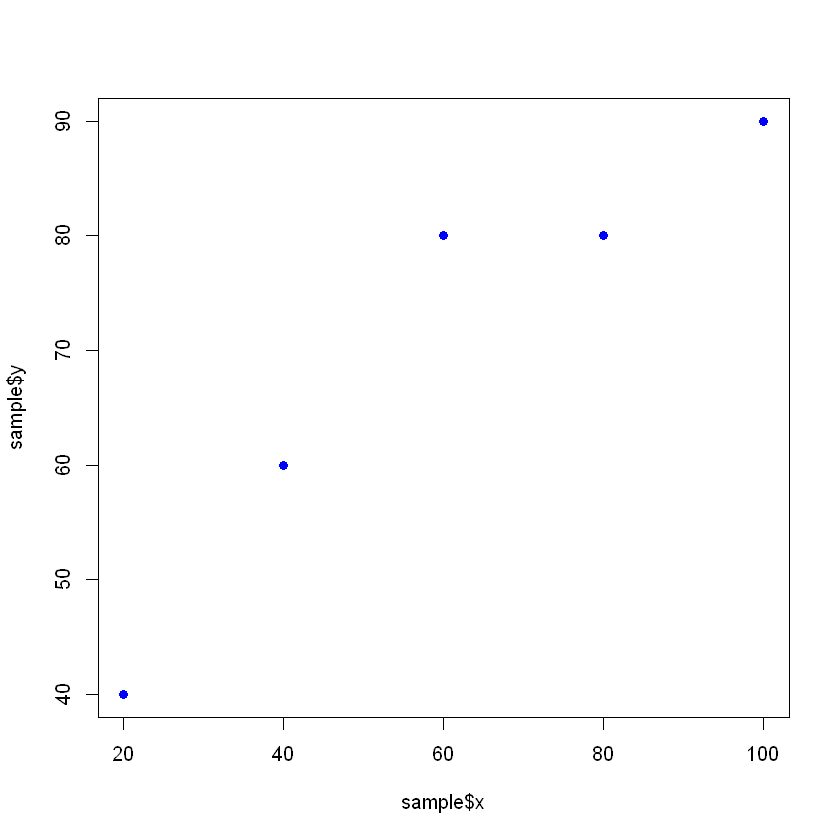

In [52]:
plot(sample$x, sample$y, pch=19, col="blue")

Now, let's use our model to visualize the fit

In [53]:
intercept = coef(model)[1]
slope     = coef(model)[2]

cat ("slope = ", slope, "\n")
cat ("intercept = ", intercept)

slope =  0.6 
intercept =  34

These are the slope and intercept values. We can now use these to plot the fit line.

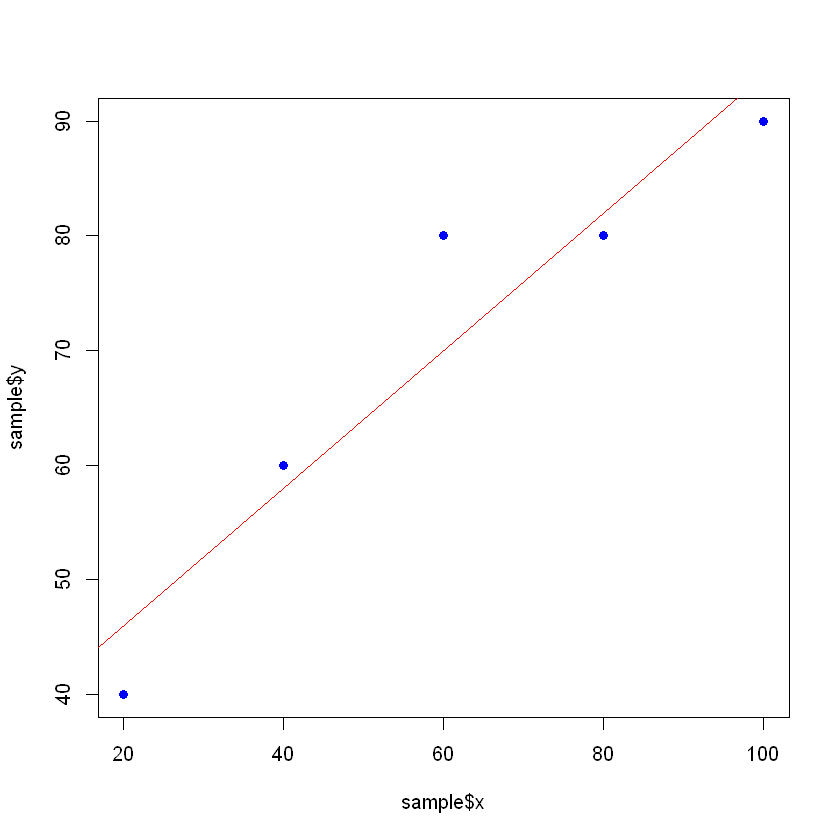

In [55]:
plot(sample$x,sample$y,pch=19,col="blue")
abline(a=intercept, b=slope, col = "red")

The model object has a whole host of other information that you can use to predict how good of a fit the line is to the data. But first, let's predict the value in a table.

In [57]:
pred_y = predict (model, newdata = data.frame(x=sample$x))
pred_y

1  2  3  4  5 
46 58 70 82 94

The differences ( residuals ) are highlighted below. 

<img src="./pics/residuals_visualized.png"/>

There are so many other parameters ( like the **p-value**, **r-squared**, **r-squared adjusted** ) and graphs ( **Residuals vs fitted** , **Q-Q Plot** etc ) that are used to analyze the performance of a model fit. We are going to get to that in the next section. To set the stage for these parameters, let's scale up our data set.

<hr>

## Multilinear Regression

So far we have seen one predictor and one response variable. This is also called **simple** linear regression. Ofcoure, real world is not that simple, right ? There can be multiple predictors. We are going to look at one such example in a classic example - Boston Housing dataset. 

It has 13 predictors and 1 response variable. So, the equation for that mathematically would be 

# $ y = a_1 x_1 + a_2 x_2 + .. + a_n x_n + b$

the value of n would be 13 in this case. Let's look at the dataset below. 

<hr>

### Boston Housing dataset

Predicting the price of a house is based on many parameters like the size, neighborhood, crime rate, pollution etc. Essentially, there is no mathematical equation that can predict the price of a house based on these parameters - that's essentially where ML comes into the picture.

In the earlier example, we just had to predict the value of **Y** given a value of __X__. There is just 1 predictor ( X ). However, let's have a look at the Boston Housing data set - tons of variables. Load the data first.



There are a couple of ways to load the data.

- Download it from <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/housing/">UCI ML repository</a>
- Load it straight from **mlbench** library

#### Download and load from file system

In [1]:
boston_housing = read.csv("./data/boston_housing.csv")

head(boston_housing,2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


The attribute names are a bit cryptic. So, here are the descriptions. 

- **CRIM**      per capita crime rate by town
- **ZN**        proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**     proportion of non-retail business acres per town
- **CHAS**      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**       nitric oxides concentration (parts per 10 million)
- **RM**        average number of rooms per dwelling
- **AGE**       proportion of owner-occupied units built prior to 1940
- **DIS**       weighted distances to five Boston employment centres
- **RAD**       index of accessibility to radial highways
- **TAX**       full-value property-tax rate per USD - 10,000
- **PTRATIO**  pupil-teacher ratio by town
- **B**        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**    % lower status of the population
- **MEDV**     Median value of owner-occupied homes in USD 1000's

#### Load it directly from **mlbench** library

In [70]:
library(mlbench)
data(BostonHousing)
head(BostonHousing,2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


How large is the dataset ? 

In [77]:
dim(boston_housing)

[1] 506  14

so, it is 506 rows and 14 columns. 

Looking back at our equation, 

# $ y = a_1 x_1 + a_2 x_2 + .. + a_n x_n + b$

- $x_1$ = CRIM - per capita crime rate by town
- $x_2$ = ZN   - proportion of residential land zoned for lots over 25,000 sq.ft.
- ..
- $x_{13}$ = LSTAT - % lower status of the population

<hr>

#### Response Variable vs Predictor

What is the problem we are trying to solve ? We are actually trying to predict the Median house price based on a variety of parameters - like Crime rate, Nitric Oxide content in the air, age of the house etc. Each of these parameters have a "say" in the price of the house. The target variable is valled the **Response Variable** and the parameters that have a "say" in determining the target variable are called the **Predictors**.

In our case, there are 12 predictors ( CRIM, ZN, INDUS...LSTAT) and 1 response variable ( MEDV ). Just for simplicity sake, let's just pick one parameter - **rm** - the number of rooms in the house. Let's see how well we predict the price of the house based on just this one parameter.

In [94]:
model = lm (medv ~ rm, data = boston_housing)

In [95]:
intercept = coef(model)[1]
slope     = coef(model)[2]

cat ("slope = ", slope, "\n")
cat ("intercept = ", intercept)

slope =  9.777871 
intercept =  -38.27585

Let's plot our predictor vs response variable as a scatter plot and draw the straight line that our model has predicted.

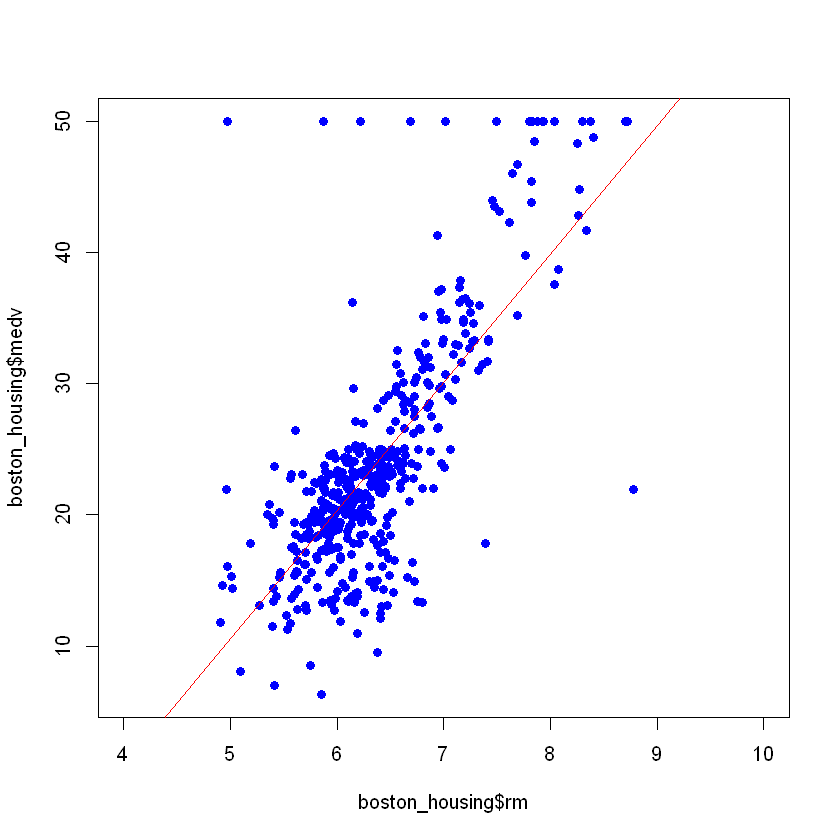

In [96]:
plot(boston_housing$rm, boston_housing$medv, pch=19, col = "blue", xlim=c(4,10)) # try this without setting the range of x values (using xlim)
abline(a=intercept, b=slope, col = "red")

Looks like a decent enough fit. Let's do another - **lstat** - lower status population percentage. 

**Step 1 - Model the data**

In [98]:
model = lm (medv ~ lstat, data = boston_housing)

**Step 2 - Determine the slope and intercept from the model**

In [99]:
intercept = coef(model)[1]
slope     = coef(model)[2]

cat ("slope = ", slope, "\n")
cat ("intercept = ", intercept)

slope =  -1.010507 
intercept =  35.31254

__Step 3 - Plot the data and fit line__

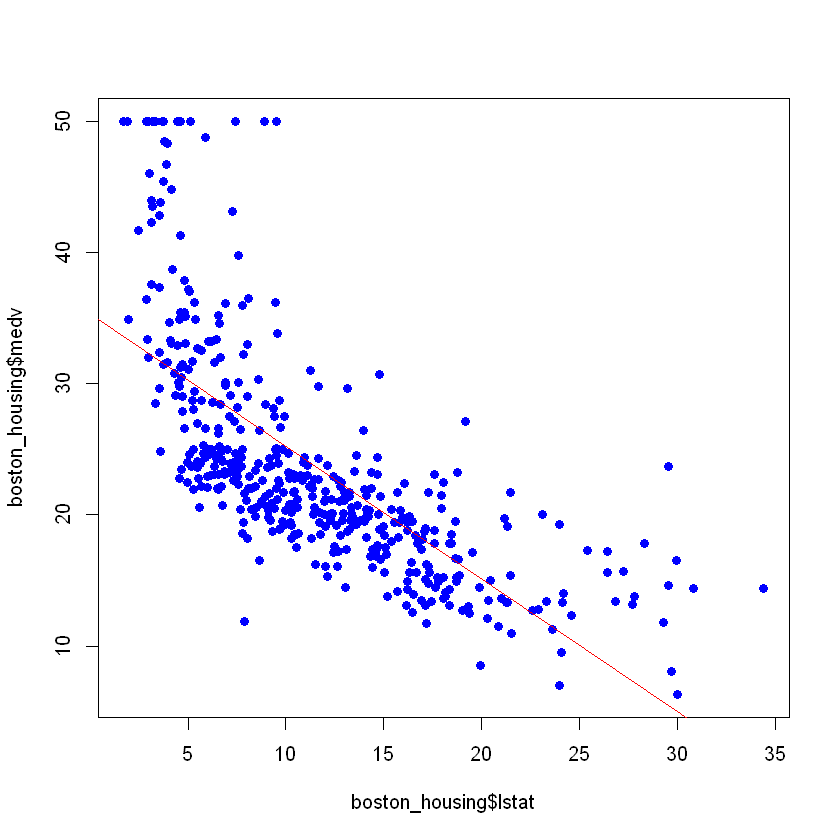

In [103]:
plot(boston_housing$lstat, boston_housing$medv, pch=19, col = "blue") 
abline(a=intercept, b=slope, col = "red")

This seems accurate enough. However, if you look at both these graphs, the relationship between the predictors and response variable seems a bit different between the predictor LSTAT vs RM. Let's put these graphs side by side to understand better. 

<img src="./pics/lstat_medv.png" style="background-color:white"/><img src="./pics/rm_medv.png" style="background-color:white"/>

The first picture is lstat vs medv and the second is rm vs medv. 

<img src="./pics/lstat_rm_medv.png"/>

Also, not all variables might be relevant ( irrespective of the direction, decrease or increase ). Let's take the parameter dis - distance to employment. Once again, if we try to fit this using our steps

slope =  0.584848 
intercept =  21.38557

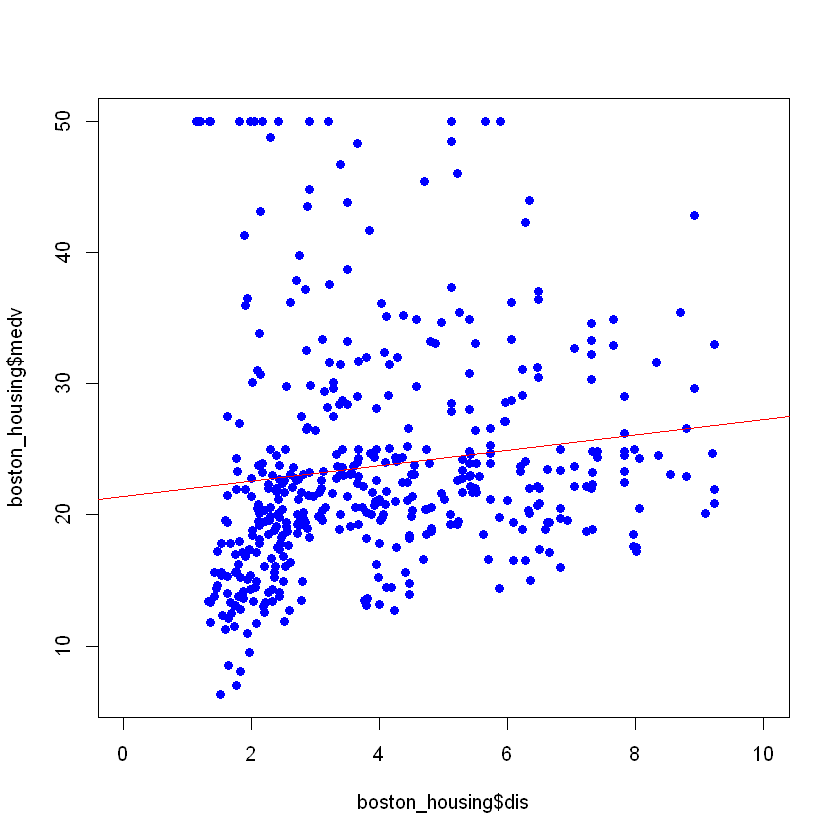

In [106]:
# step 1
model = lm (medv ~ dis, data = boston_housing)

# step 2
intercept = coef(model)[1]
slope     = coef(model)[2]

cat ("slope = ", slope, "\n")
cat ("intercept = ", intercept)

# step 3
plot(boston_housing$dis, boston_housing$medv, pch=19, col = "blue",xlim=c(0,10)) 
abline(a=intercept, b=slope, col = "red")

Visually, there is not much of a linear relationship between distance and median value ( although we tried to fit it ). How exactly do we measure the relationship ?

<hr>

### Correlation

This is the simplest measure of relation between 2 numeric variables. Luckily, pandas provides a built-in method for calculating correlation - **corr ( )**. For example,

In [117]:
# use = "pairwise.complete.obs" ensures that NAs are handled 
cor(boston_housing$medv, boston_housing$dis, use = "pairwise.complete.obs")

[1] 0.1387984

Correlation values are calculated to values between 0 and 1. Technically, the values can vary between -1 and +1. 0 being no correlation and 1 being highly correlated ( -1 also signifies a high correlation, just that it is a negative correlation , meaning if the predictor values increases, the response value decreases). In the example above, the relationship between distance and median value is just 13 %. How about others predictors ?



In [118]:
cor(boston_housing$medv, boston_housing$lstat, use = "pairwise.complete.obs")

[1] -0.7062551

In [119]:
cor(boston_housing$rm, boston_housing$medv, use = "pairwise.complete.obs")

[1] 0.7401808

This seems in-line with our plots above right ? 

> Correlation is NOT causation

However strong the correlation is, it does NOT imply causation. This is a bit tricky to understand. For example, look at the picture below.

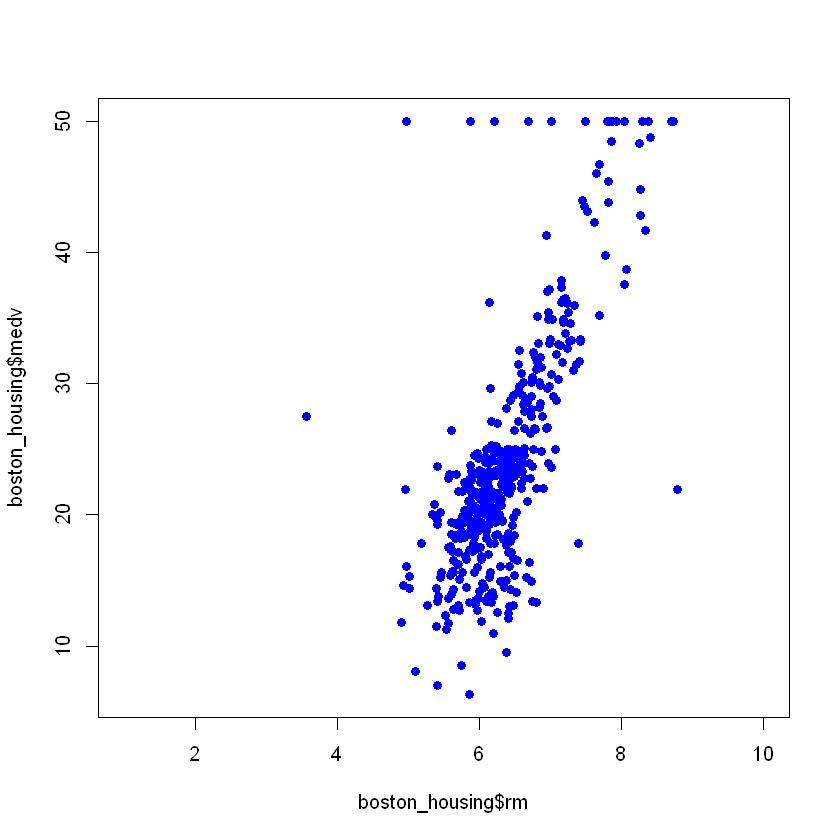

In [5]:
plot(boston_housing$rm,boston_housing$medv,xlim=c(1,10), pch=19, col="blue")

There seems to be a significant correlation between the number of rooms ( **rm** ) and the median price value (**medv**). 

<img src="./pics/rm-medv-correlation.png"/>

Now, imagine another column - _Power Consumption_ . As the number of rooms increase, the power consumption also tends to increase. 

<img src="./pics/correlation-power-medv.png"/>

Does it mean that _Power Consumption_ has a strong correlation with the house price ? Very unlikely - isn't it ? Mathematically, **correlation** is just a tool that signifies the level of correlation between 2 variables. However, it is upto us (or the domain expert) to determine if the correlation is real or ficticious. 

<hr>

### Quiz

**Question** : The higher the correlation, lower the stronger is the relationship between the variables. 

- True
- False

**Question** : Correlation is a measure of how strong the relationship is between two variables.

- True
- False

**Question** : -0.95 represents a strong positive correlation

- True
- False

**Question** : A correlation value of 0 shows that there is a perfect correlation between the variables

- True
- False

**Question** : The picture above shows a strong negative correlation

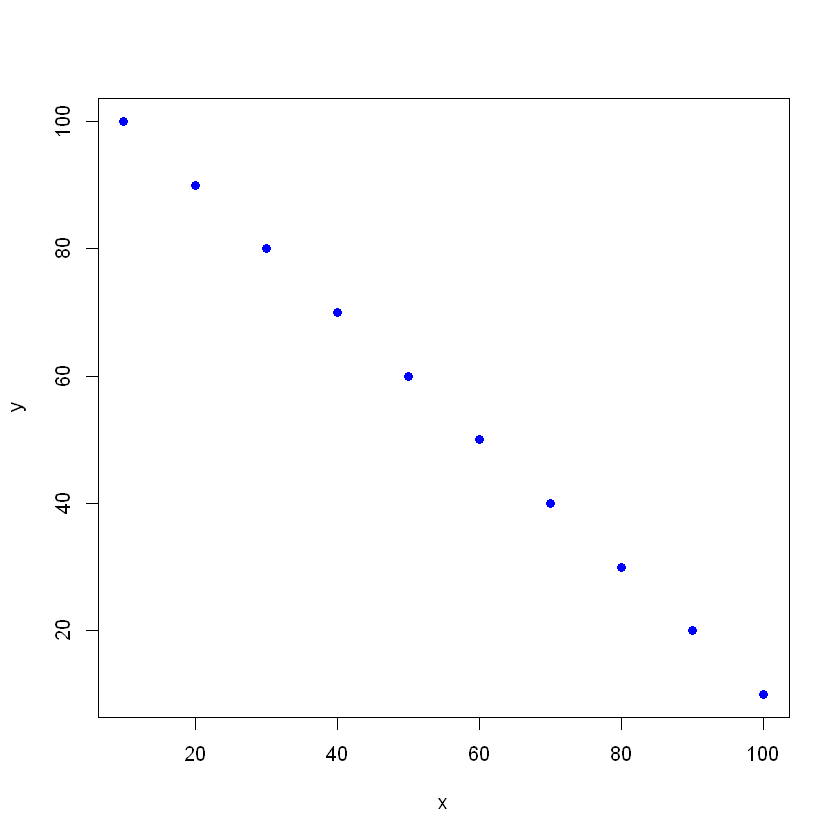

In [58]:
x = c(10,20,30,40,50,60,70,80,90,100)
y = c(100,90,80,70,60,50,40,30,20,10)

plot(x,y, pch=19, col="blue")

- True
- False

<hr>

### p value

While the correlation quantifies the relationship between two variables, it doesn't tell us if the relationship is **statistically significant**. The word **statistically significant** deserves an explanation. If a relationship (between two variables) is NOT caused by chance, then it is **statistically significant** . That is exactly what p-value answers. Also called probability value, p-value answers the following question -

> **If a predictor is relevant to predict the response and if yes, how relevant is it ?**

We have to understand p-value in the context of Null Hypothesis.



#### Null Hypothesis

Null hypothesis (denoted as **H<sub>0</sub>** assumes that there is no relationship between the predictor and the response variable. For example, if you look at the relationship between the number of rooms ( rm ) and the median price value of the home ( medv ) in the Boston Housing dataset, Null hypothesis says that there is NO relationship between them.



<img src="./pics/rm-medv.png"/>

Well, although we can see a linear relationship visually ( almost ) between those 2 variables, we start off with the Null Hypothesis. It is indicated in statistics as **H<sub>0</sub>** 



Alternate hypothesis indicates that they are related. It is indicated as **H<sub>1</sub>** . P-value indicates how much the observed data is inconsistent with the Null Hypothesis. This is a bit cryptic, right ? Let's explore this further.



Let's just consider 2 random variables that are normally distributed. Since they are random variables, there would be no relationship between them, right ? Let's check it out.



**Dataset 1**

A normal distribution of 100 values with a mean of 100 and sd of 20


In [8]:
x = rnorm(n = 100, mean = 100, sd = 20)

**Dataset 2**

Another normal distribution of 100 values with a mean of 100 and sd of 20


In [9]:
y = rnorm(n = 100, mean = 100, sd = 20)

Let's plot **x** vs __y__ and see how it looks.



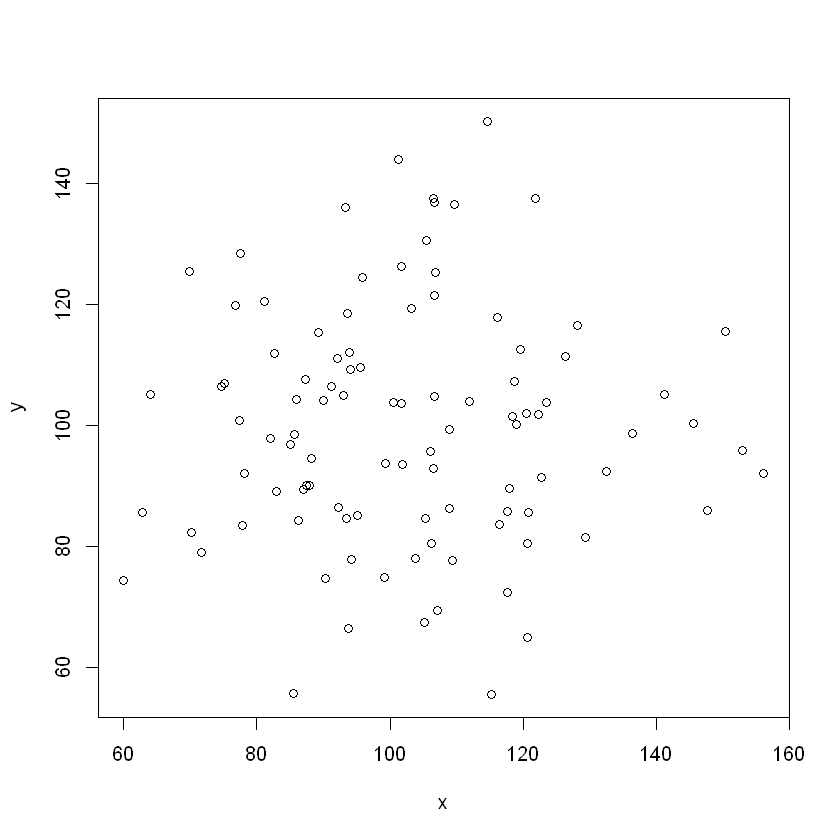

In [10]:
plot(x,y)

This almost looks like the night sky, isn't it ? Point being, there is no relationship between **x** and __y__ as they are random variables - That is pretty understandable right ? Let's try to calculate a relationship between these two variables ( although there is none ) and see how it compares against another situation where there IS actually a relationship.



slope =  0.01513006 
intercept =  98.19433

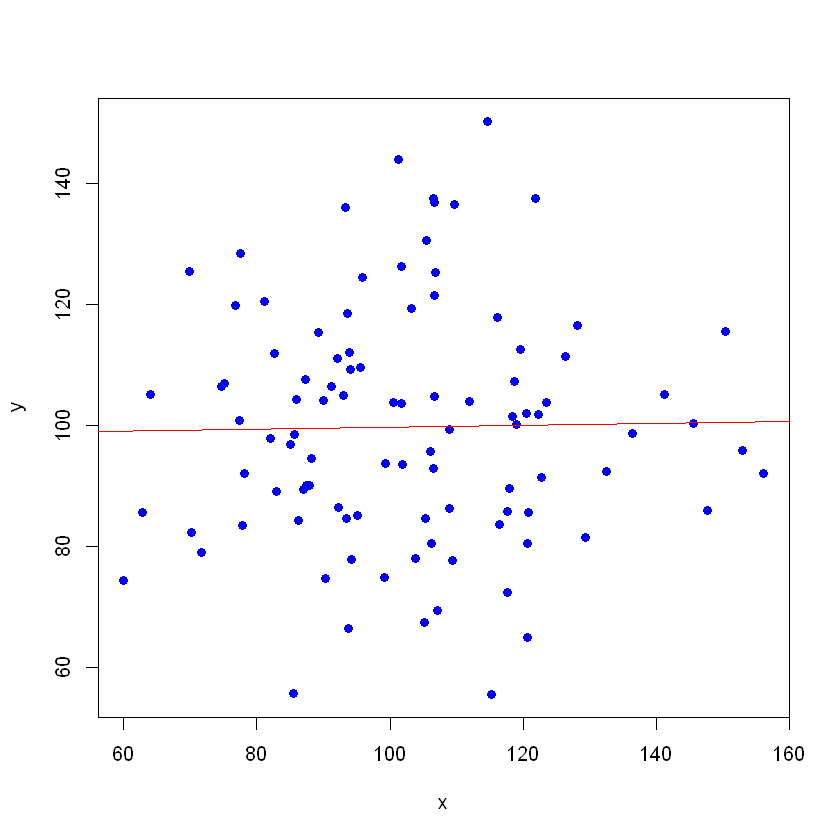

In [12]:
# step 1
model = lm (y ~ x)

# step 2
intercept = coef(model)[1]
slope     = coef(model)[2]

cat ("slope = ", slope, "\n")
cat ("intercept = ", intercept)

# step 3
plot(x, y, pch=19, col = "blue") 
abline(a=intercept, b=slope, col = "red")

What is the **p-value** in this case ? Look at the summary of the linear model. The last column against the predictor (x in this case) is the p-value.



In [15]:
summary(model)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.483 -14.434  -0.342  11.768  50.386 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 98.19433   10.12278   9.700 5.41e-16 ***
x            0.01513    0.09677   0.156    0.876    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.69 on 98 degrees of freedom
Multiple R-squared:  0.0002494,	Adjusted R-squared:  -0.009952 
F-statistic: 0.02445 on 1 and 98 DF,  p-value: 0.8761


And the **p-value** in this case is 0.89. 

p-value is 0.89 - that's 89 %. p-value is always between 0 and 1. 0.89 is a big number right ? Does it indicate that there is a strong relationship between x and y in this case ? On the contrary, a high p-value indicates that the there is NO relationship between x and y - which is what the Null Hypothesis states.

On the other hand, if we calculate the p-value of the relationship between the number of rooms ("RM") and median price ("MEDV"), then you get a very small value. 

In [16]:
model = lm (boston_housing$medv ~ boston_housing$rm)

summary(model)


Call:
lm(formula = boston_housing$medv ~ boston_housing$rm)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.674  -2.488  -0.168   2.411  39.680 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -38.2758     2.6708  -14.33   <2e-16 ***
boston_housing$rm   9.7779     0.4187   23.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.93 on 450 degrees of freedom
  (54 observations deleted due to missingness)
Multiple R-squared:  0.5479,	Adjusted R-squared:  0.5469 
F-statistic: 545.3 on 1 and 450 DF,  p-value: < 2.2e-16


p-value in this case is 2.0 x 10<sup>-16</sup>. That is an extremely low value ( 0.0000..00248 ) . 

> What it means is that there is a 0.0000..00248 % chance that the correlation is random.  

or in other words, there is a 99.99999 % chance that the data does represent a relationship between the two variables. Whereas in the case of the random variales, there is a 89% chance that the correlation is random

<hr>

### Optimum p-value

A value below which we can safely conclude that the relationship between 2 variables did not happen by chance, but because there is a true causal relationship, is called an optimum p-value.  

> Is there a fixed p-value below which, we can safely conclude a strong relationship (Alternate Hypothesis) ?

Typically p <= 0.05 is accepted in most cases. However, the actual value at which the business is comfortable is based on a variety of parameters like 
- type of data
- level of confidence the business requires etc

<hr>

## r-squared - r2

R-squared is a measure of the explanatory power of the model - How well are the variables able to explain the response variables using the model. A model's r<sup>2</sup> varies between 0 and 1. Applying the summary function on the **lm ( )** model should give us the r<sup>2</sup> value. 

In [24]:
model = lm (boston_housing$medv ~ boston_housing$rm)

summary(model)$r.squared

[1] 0.5478676

In the example above, we tried to model the response variable medv ( median house value ) as a measure of the number of rooms ( rm ) - the r<sup>2</sup> value is 0.547 . It is a measure of how well the model explains the relationship. A low value of r<sup>2</sup> ( r<sup>2</sup> = 0 ) means that the explanatory variables are not able to predict the response variable well

A high value or r<sup>2</sup> ( r<sup>2</sup>= 1 ) means that the explanatory variables are fully able to predict the response - In this case the number of rooms ( rm ) is able to explain the variance in the median house value around 48 %. The remaining 52% variance is unexplained by the explanatory variable. 

<hr>

## How is r2 calculated

The formula to calculate r<sup>2</sup> is 

<img src="./pics/r2-calculation.png"/>

The denominator **Sum of Squares <sub>total</sub>**   is the worst possible score. The numerator **Sum of Squares <sub>residuals</sub>** is how far the model is performing. So **r <sup>2</sup>** is essentially a normalized score of how well the model is predicting the data - in comparision to the worst possible score.

What do we mean by **worst possible** score ? Well, if we know the weights of each of the individuals in the class, without any indicator of whose that weight is ( just a list of weights ), what is our best possible prediction of weight for anybody in the class ? We just do an arithmetic average - right ? And that's what we use to calculate the **Sum of Squares <sub>total</sub>** . 

Let's calculate r<sup>2</sup> by hand for our simple dataset. 

<img src="./pics/r_squared_for_simple_data.png"/>

Let's verify this in R.

In [28]:
x = c(20,40,60,80,100)
y = c(40,60,80,80,90 )

In [29]:
model = lm (y ~ x)

summary(model)$r.squared

[1] 0.9

There you go - our manual calculation verifies with R's calculation. 

**Exercise** - Calculate the **r<sup>2</sup>** value of of Boston housing dataset for the predictor - NOX ( Level of Nitric Oxide in the air ).

<hr>

## r-squared adjusted 

Mathematically, r<sup>2</sup> has a peculiar property. Adding more predictors increases the value of r<sup>2</sup> . This is not very intuitive to begin with. Let's try it on our Boston Housing dataset. 

In the example above, we have tried to model medv from rm . So, the only explanatory variable is rm ( number of rooms ). Based on that relationship we have an r<sup>2</sup> value of 0.54 . What would happen if we add another explanatory variable ? - say lstat ( percentage of lower status of the population ). 

In [30]:
# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status

model = lm (boston_housing$medv ~ boston_housing$rm + boston_housing$lstat)

summary(model)$r.squared

[1] 0.6523057

See, the **r <sup>2</sup>** has increased from 0.48 to 0.63 by including a second predictor. How about a third predictor ?

In [31]:
# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status
# 3. NOX   - Nitric oxide in the air

model = lm (boston_housing$medv ~ boston_housing$rm + boston_housing$lstat + boston_housing$nox)

summary(model)$r.squared

[1] 0.6526716

There is a slight increase in **r <sup>2</sup>** - from 0.6385 to 0.6389. 

**r<sup>2</sup>** value &nbsp; &nbsp;- Predictors <br>
0.483525 - number of rooms  <br>
0.638561 - number of rooms + lower stata population <br>
0.638910 - number of rooms + lower stata population + Nitric Oxide in the air


You can keep adding as many predictors as you want and you can observe that **r <sup>2</sup>** value always increases with every predictor. That doesn't seem right. Isn't it ? Let's try something. To the boston housing dataset, let's add a column with just random numbers and see if **r <sup>2</sup>** still increases. If it does, then we have a problem. 

In [34]:
# Generate a column of 506 random numbers
x = rnorm(n = 506, mean = 100, sd = 20)

# and add it to the boston dataset
boston_housing_new = cbind(boston_housing, x)

# what is the new shape ? It should be 13 columns ( as opposed to the original 12 )
dim ( boston_housing_new)

[1] 506  15

Now, let's try the regression with the predictors RM, LSTAT, NOX and the new random variable.

In [35]:
model = lm (boston_housing_new$medv ~ boston_housing_new$rm + boston_housing_new$lstat + boston_housing_new$nox + boston_housing_new$x)

summary(model)$r.squared

[1] 0.6526719

**r2 value    - Predictors** <br>
0.483525 - number of rooms <br>
0.638561 - number of rooms + lower stata population <br>
0.638910 - number of rooms + lower stata population + Nitric Oxide in the air<br>
0.639007 - number of rooms + lower stata population + Nitric Oxide in the air + **some random variable**

This is crazy, right ? Just add any random variable ( which is not supposed to have any predictive power) and still the **r <sup>2</sup>** increases ? You are probably beginning to doubt the predictive power of **r <sup>2</sup>** in the first place. Well, it's not all bad with **r <sup>2</sup>**. Just that every random variable has some predictive power. In order to counter this, there is a new variable called **r<sup>2</sup> adjusted**. 

<img src="./pics/r-squared-adjusted.png"/>

where
- n = sample size
- p = number of predictors


Essentially, the new parameter **r<sup>2</sup> adjusted** works by penalizing more parameters. That is why **p** - the number of predictors is in the denominator. 

What it goes to show is that, adding more predictors does not necessarily increase the explanatory power of the model. r<sup>2</sup> adjusted accommodates for this by incorporating a penalty for the number of predictors ( more the predictors, lesser the r<sup>2</sup> adjusted ).

When you add a predictor it should add significant value. If it is not ( For example, adding NOX - Nitric Oxide as a predictor ) r<sup>2</sup>-adjusted tells you that it is a worthless predictor and you better get rid of it. 

In [36]:
summary(model)$adj.r.squared 

[1] 0.6495638

In [37]:
summary(model)$r.squared

[1] 0.6526719

<hr>

### Exercise

As an exercise, please model a multi-linear regression of Boston Housing dataset using

- Scenario 1 - number of rooms + lower stata population + Nitric Oxide in the air
- Scenario 2 - number of rooms + lower stata population + Nitric Oxide in the air + random variable

Calculate r<sup>2</sup> and r<sup>2</sup> adjusted for both the scenarios. Did r<sup>2</sup> adjusted decrease or increase in scenario 2 ?


<hr>

### RMSE - Root Mean Square error

While r<sup>2</sup> is a relative measure of fit, **RMSE** is an absolute measure of fit. Lower values indicate a better fit and higher values not. Calculating RMSE is quite simple - it is quite similar to the standard deviation (the square root of variance). While Standard Deviation ( sd ) is a measure of how far the distribution is from the mean, RMSE is a measure of how far the fit is from the actuals. 

<img src="./pics/residuals_visualized_2.png"/>

So, to calculate the **RMSE**, you just have to borrow the residuals from the model and do a couple of mathematical operations ( quite similar to how you do them to the differences from the mean in the case of mean ) 

### $RMSE = \sqrt{\sum (residual)^2}$

In [42]:
sqrt( mean ( summary(model)$residuals ^2 )  )

[1] 5.185564

Now, you might have a question here. When you already have the **RMSE** to measure the fit, why do you need another metric - **r<sup>2</sup>** ? Well, you can't measure the growth rate of an elephant and a horse in absolute terms. RMSE is in the magnitute of the actual response variable, while **r<sup>2</sup>** is on a uniform scale ( 0 to 1 ). 

<hr>

## Feature Selection

In the Boston Housing dataset example, there are 13 predictors and 1 response variable. And the response variable is MEDV - Median house value. 

Previously, we have seen some examples of predicting the house value based on a random set of predictors - 
- RM - Number of rooms
- LSTAT - Percentage of people with lower status
- NOX - Nitric oxide content
etc. 

However, we know that not all these variables have an equal say. So, how do we know which of the predictors have the most impact in predicting the house price ?

> The process of identifying the features ( predictors ) that have the most **predictive power** is called  **Feature Selection**

This process is called **Stepwise Regression**. Let's explore it in the next section. 

<hr>

### Stepwise Regression

In stepwise regression, we select a parameter to determine the fit. Based on how well the model is being fit, we add or keep removing predictors ( features ) until we come to a point where we can longer improve the model based on the selected parameter. 

What kind of parameters can be used to evaluate the model ? There are many choices like

- p-value
- r-squared
- r-squared (adjusted )
- F-tests or T-tests
etc

For now, since we are already aware of **p-value** let's choose it as our selection criteria parameter. 

In [44]:
model = lm ( medv ~ . , data= boston_housing)
summary(model)


Call:
lm(formula = medv ~ ., data = boston_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3991  -2.5377  -0.5848   1.7101  27.9916 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.866365   5.477190   3.810 0.000159 ***
crim         -0.238025   0.223853  -1.063 0.288229    
zn            0.038221   0.013372   2.858 0.004462 ** 
indus         0.051356   0.059643   0.861 0.389683    
chas          2.435048   0.829794   2.935 0.003516 ** 
nox         -11.657986   3.928009  -2.968 0.003163 ** 
rm            5.110158   0.454838  11.235  < 2e-16 ***
age          -0.006094   0.013101  -0.465 0.642031    
dis          -1.271514   0.195766  -6.495 2.26e-10 ***
rad           0.294444   0.085387   3.448 0.000619 ***
tax          -0.011360   0.003612  -3.145 0.001776 ** 
ptratio      -0.831030   0.127000  -6.544 1.68e-10 ***
b             0.012314   0.003513   3.505 0.000503 ***
lstat        -0.520753   0.057428  -9.068  < 2e-16 ***
---

Since we have to chosen **p-value** as our key assesment criteria, we are interested in this part of the table. 

<img src="./pics/p-values-model.png"/>

Irrespective of the selection criteria, there are 2 basic methods in stepwise regression. 
- **Backward Elimination**
- **Forward Selection**

<hr>

### Backward Elimination

As we see from the table above, not all predictors have the same p-value. So, in backward elimination, we start by eliminating the predictor with the worst parameter value (p-value in this case) and re-evaluate the model again. 

<img src="./pics/backward-elimination-1.png"/>

In [55]:
# Eliminate INDUS predictor. 
X = boston_housing[,c(1,2,4,5,6,7,8,9,10,11,12,13,14)]

In [56]:
model = lm(medv ~ . , data = X)
summary(model)


Call:
lm(formula = medv ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3513  -2.5184  -0.5814   1.6283  28.0395 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.669661   5.470812   3.778 0.000180 ***
crim         -0.233426   0.223724  -1.043 0.297353    
zn            0.037131   0.013308   2.790 0.005498 ** 
chas          2.508402   0.825166   3.040 0.002508 ** 
nox         -10.830319   3.807459  -2.845 0.004656 ** 
rm            5.075414   0.452912  11.206  < 2e-16 ***
age          -0.006238   0.013096  -0.476 0.634071    
dis          -1.307708   0.191144  -6.841 2.64e-11 ***
rad           0.278620   0.083362   3.342 0.000902 ***
tax          -0.010031   0.003265  -3.072 0.002258 ** 
ptratio      -0.817289   0.125956  -6.489 2.34e-10 ***
b             0.012233   0.003511   3.485 0.000542 ***
lstat        -0.515724   0.057113  -9.030  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Res

Eliminate Crime ( crim) next. 

Zone (zn) is the next parameter that has a relatively higher value. 

In [57]:
# Eliminate CRIM predictor. 
X = boston_housing[,c(2,4,5,6,7,8,9,10,11,12,13,14)]

model = lm(medv ~ . , data = X)
summary(model)


Call:
lm(formula = medv ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7560  -2.4916  -0.5937   1.6188  28.1229 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.327935   5.434858   3.924 0.000101 ***
zn            0.035475   0.013214   2.685 0.007535 ** 
chas          2.544654   0.824517   3.086 0.002155 ** 
nox         -11.589297   3.737700  -3.101 0.002055 ** 
rm            5.043166   0.451901  11.160  < 2e-16 ***
age          -0.006310   0.013097  -0.482 0.630189    
dis          -1.297433   0.190909  -6.796 3.51e-11 ***
rad           0.220041   0.061626   3.571 0.000395 ***
tax          -0.010079   0.003265  -3.087 0.002152 ** 
ptratio      -0.815266   0.125954  -6.473 2.57e-10 ***
b             0.012720   0.003480   3.655 0.000288 ***
lstat        -0.527443   0.056004  -9.418  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.552 on 440 degrees of freedom
 

Next, we eliminate age. 

In [58]:
# Eliminate CRIM predictor. 
X = boston_housing[,c(2,4,5,6,8,9,10,11,12,13,14)]

model = lm(medv ~ . , data = X)
summary(model)


Call:
lm(formula = medv ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.6405  -2.5670  -0.5505   1.6077  27.8556 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  21.679282   5.381020   4.029 6.60e-05 ***
zn            0.036260   0.013102   2.768 0.005885 ** 
chas          2.525351   0.822826   3.069 0.002279 ** 
nox         -12.097475   3.582668  -3.377 0.000799 ***
rm            4.988713   0.437159  11.412  < 2e-16 ***
dis          -1.271884   0.183237  -6.941 1.40e-11 ***
rad           0.222320   0.061391   3.621 0.000327 ***
tax          -0.010122   0.003261  -3.104 0.002034 ** 
ptratio      -0.820426   0.125389  -6.543 1.68e-10 ***
b             0.012598   0.003468   3.633 0.000313 ***
lstat        -0.537831   0.051641 -10.415  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.548 on 441 degrees of freedom
  (54 observations deleted due to missingness)
Multiple 

At this point, almost all of the predictors have a significantly lower enough ( < 0.05 ) p-value. If you want to go further, probably you will end up with a set of predictors like this.

<img src="./pics/backward-elimination-3.png"/>

Stepwise regression with backward elimination (based on **r<sup>2</sup>**) is just one of the methods. There are many other methods that we will be learning as we progress through the course. 

<hr>

## Accuracy of the model

We have seen enough statistics for now. But we haven't actually predicted anything yet, right ? Using the 5 parameters that we have narrowed down to, let's start predicting median house prices and see how accurate our model is. 

In order to predict data, we first need to train the model ( which we have done already ). However, instead of training the model on the entire dataset, we split the data into training and test data sets. This process is also called Train/Test split. And as you might have guessed already, doing this R is pretty easy.

### Training and Test datasets

How many rows of data do we have in Boston Housing dataset ? 

In [59]:
dim(boston_housing)

[1] 506  14

506 rows. That's all the data we have. Now, let's split this data into training and test datasets. What is the ratio of the split ? 

<img src="./pics/train-test-data-split.png"/>

Typically a 80-20 % split should do. You can also do a 75-25 % split. The exact percentage splits would probably be based mostly on the accuracy of the data and a bit of trail and error. 

Essentially, this what we are trying to do. 

<img src="./pics/boston-housing-train-test-split.png"/>

Use R's **sample ( )** function to sample the indices of 80% of the dataset size. 

In [61]:
# Split the data to train and test

# 1. Get the number of rows 
rows = nrow(boston_housing)

# 2. sample out 80% of the numbers between 1 and the number of rows
index = sample(1:rows, rows*0.8)

# 3. get the training data using the indices that correspond to 80% of the dataset
train = boston_housing[index,]

# 4. The remaining part of the data set becomes the test dataset. 
test = boston_housing[-index,]

Now, that we know how to do the split, let's do it on just the predictors that we need. 

In [64]:
# Fit model based on 
# 1. RM - Number of rooms
# 2. LSTAT - Percentage of people with lower status
# 3. DIS   -  weighted distances to five Boston employment centres
# 4. PRATIO - pupil-teacher ratio by town 
# 5. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

model = lm ( medv ~ rm + lstat + dis + ptratio +  b, data = boston_housing)

Now that we have trained the model, let's test it. 

In [65]:
pred = predict ( model, newdata = test )

Now, let's find out how accurate our predictions are. A quick and dirty way to visually see this would be to plot the predicted vs actuals on a scatterplot. 

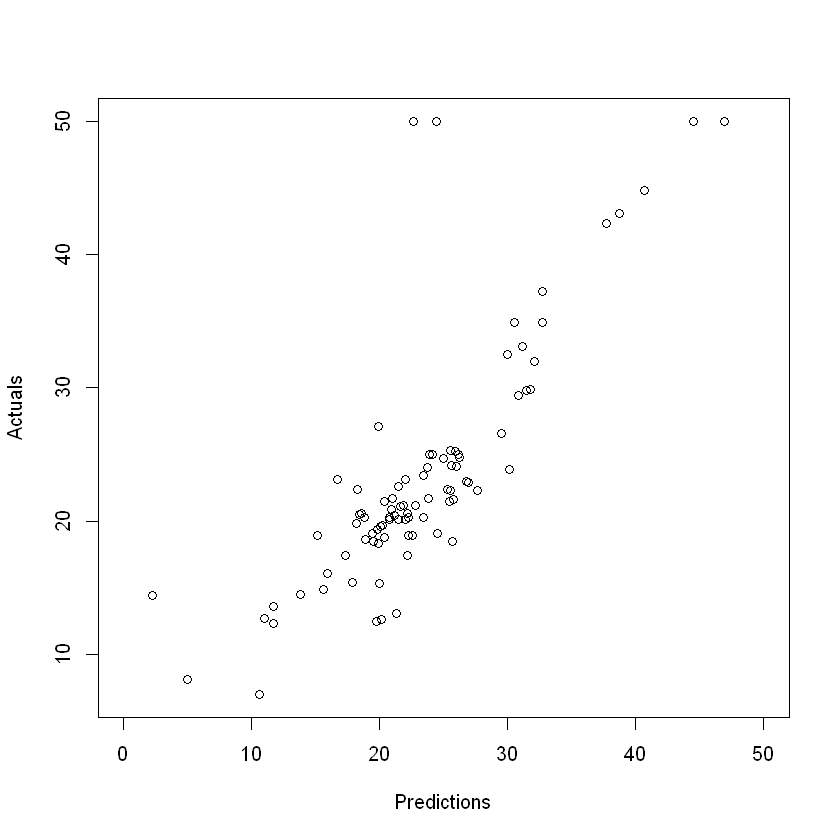

In [70]:
plot ( pred, test$medv,
       xlab = "Predictions",
       ylab = "Actuals",
       xlim=c(0,50))  # use the xlimit to avoid some wild predictions

If the prediction were 100% correct, we would get a perfect 45<sup>0</sup> line. Let's draw that as a baseline to compare the prediction's performance. 


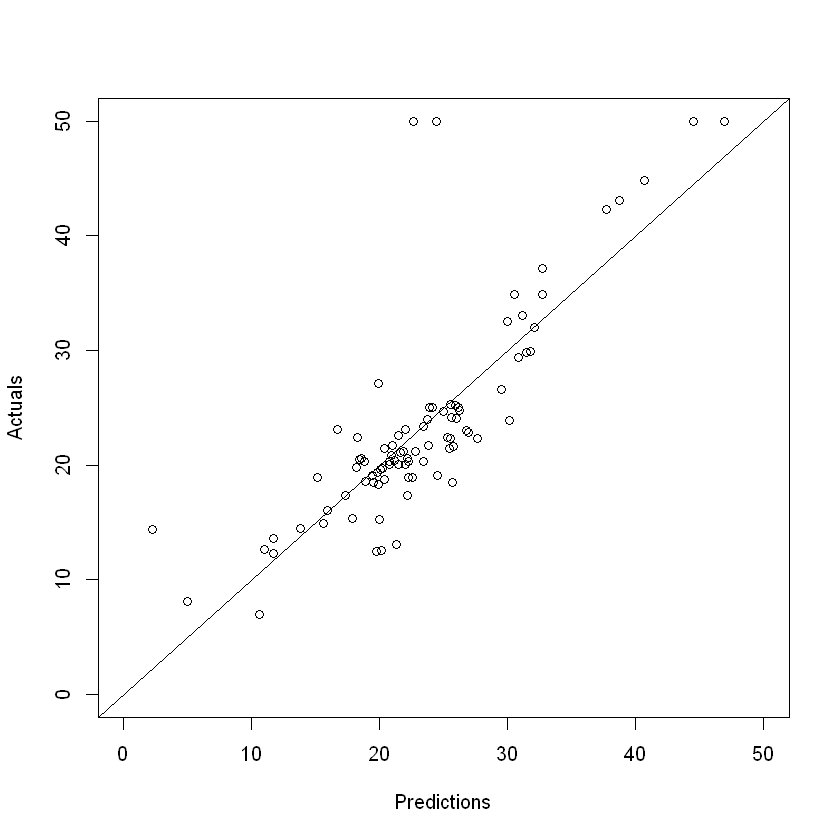

In [73]:
plot ( pred, test$medv,
       xlab = "Predictions",
       ylab = "Actuals",
       xlim=c(0,50),
       ylim=c(0,50))  # use the xlimit to avoid some wild predictions

abline(0,1)

That's not a bad fit. Let's calculate the r<sup>2</sup> to have a numeric estimate of how good of a fit we have. 

In [74]:
summary(model)$r.squared

[1] 0.7144253

That's an **r<sup>2</sup>** of *0.7*. So, we can say that we are **70% accurate** in our prediction. 

<hr>

## Polynomial Regression

So far, we have seen examples of **Linear Regression** ( both simple and multi). However, not all types of data can be fit into a Linear Regression. For example, population growth is a good example of a non-linear data. Probably a better word for it is **exponential** growth. Let's take a simple example - The population of India and how it is projected to grow in this century. ( This is real data taken from United Nations at https://population.un.org/wpp/Download/Standard/Population/ )

In [1]:
india = read.csv("./data/india_population.csv")
head(india)

,year,population
,<int>,<int>
1,1950,376325200
2,1951,382245303
3,1952,388538620
4,1953,395160091
5,1954,402077026
6,1955,409269055


Let's plot this 150 years of data ( since 1950 until 2015 and projected data until 2100)

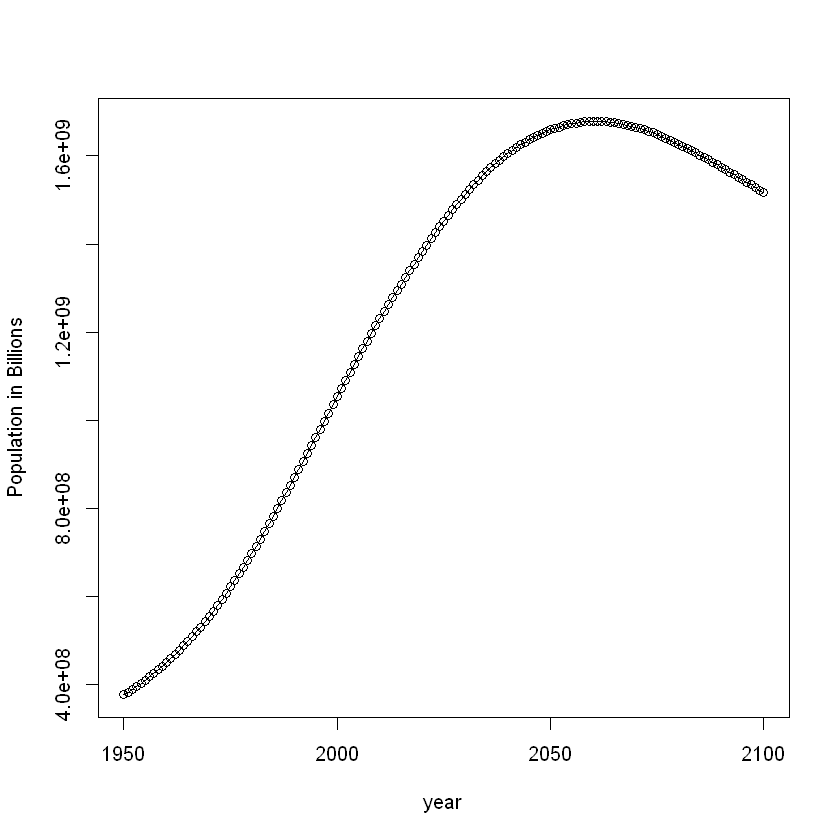

In [11]:
plot(india$year, india$population,
     xlab = "year",
     ylab = "Population in Billions",
     type = "n")  # does not produce any points or lines
     
lines(india$year, india$population, type="o")

Can you imagine trying to fit this data using Linear Regression ? Well, it is going to be a huge approximation after - say 2040 where the linearity ends. Let's try it to see how well it fits. 

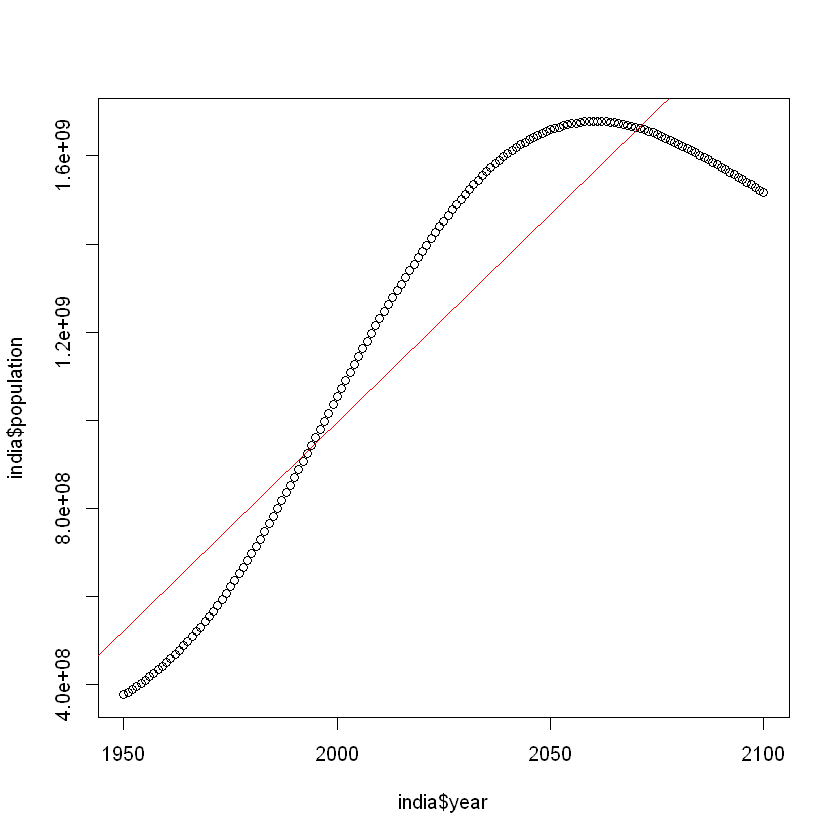

In [15]:
# build the model
model = lm ( india$population ~ india$year, data = india)

# scatter plot
plot(india$year,india$population)

#get slope and intercept
intercept = coef(model)[1]
slope     = coef(model)[2]

# fit line.
abline(a=intercept, b=slope, col = "red")

Well, it does an OK job given that the model is linear, but can we account for the curve somehow ? 

This is exactly where **polynomials** come in. sklearn has built-in methods for this - **PolynomialFeature** . Let's use it to fit the data. 

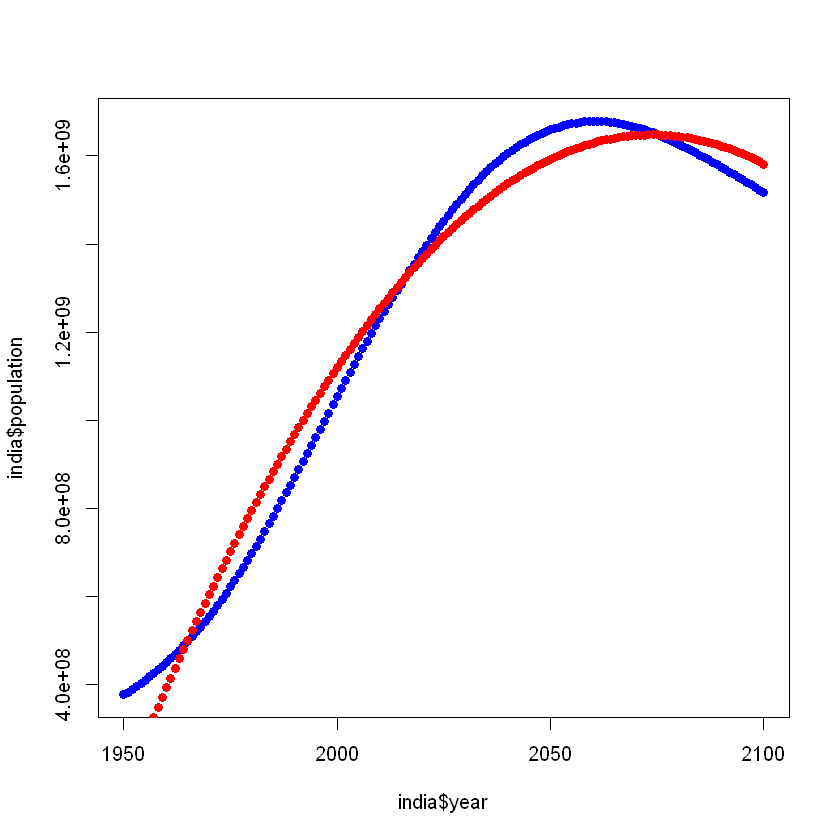

In [30]:
# build the model
model = lm ( india$population ~ india$year + I(india$year ^ 2), data = india)

# fit line.
pred = predict(model, newdata = india)

# scatter plot
plot(india$year,india$population, pch=19, col= "blue")
points (india$year, pred, pch=19, col= "red")

In [31]:
summary(model)


Call:
lm(formula = india$population ~ india$year + I(india$year^2), 
    data = india)

Residuals:
       Min         1Q     Median         3Q        Max 
-101455469  -56743742   -2325066   54151912  214380534 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -4.149e+11  1.331e+10  -31.18   <2e-16 ***
india$year       4.017e+08  1.315e+07   30.55   <2e-16 ***
I(india$year^2) -9.685e+04  3.246e+03  -29.84   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 67780000 on 148 degrees of freedom
Multiple R-squared:  0.9777,	Adjusted R-squared:  0.9774 
F-statistic:  3242 on 2 and 148 DF,  p-value: < 2.2e-16


What is really happening here ? A single column ( year ) has now become 3 columns.

<img src="./pics/poly_fit.png"/>

The original linear equation <br> $y = a x_1 + b$ <br> has been transformed to <br> $y = 1 + a_1 x_1 + a_2 x_1^2 + b$

We can put both these models on the same plot and you can see how well the prediction hugs the data. 

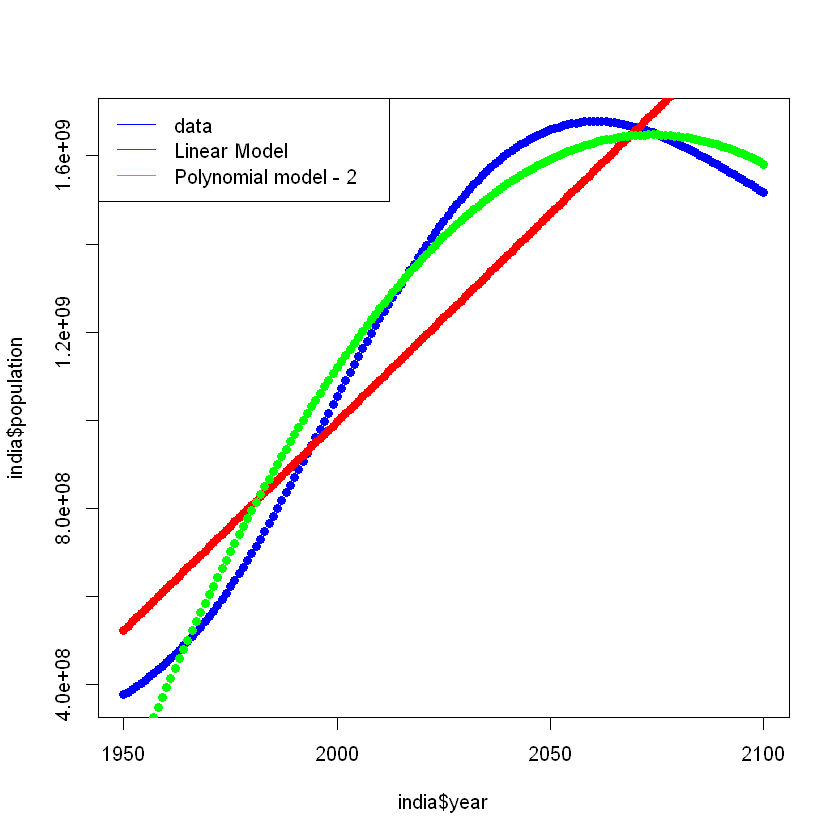

In [55]:
# build the models
model_lin    = lm ( india$population ~ india$year )
model_poly_2 = lm ( india$population ~ india$year + I(india$year ^ 2))

# fit line.
pred_lin    = predict(model_lin, newdata = india)
pred_poly_2 = predict(model_poly_2, newdata = india) 

# scatter plot
plot(india$year,india$population, pch=19, col= "blue")
points (india$year, pred_lin, pch=19, col= "red")
points (india$year, pred_poly_2, pch = 19, col = "green")

#put a legend as well. 
legend("topleft", legend=c("data", "Linear Model", "Polynomial model - 2"),
       col=c("blue", "red", "green"), lty=1)

Visually, you can see the green line (polynomial fit) seems to follow the blue line(data) much better than the red line(linear fit), right ? How about we go one step further and see if increasing the polynomial degree would make this any better. 

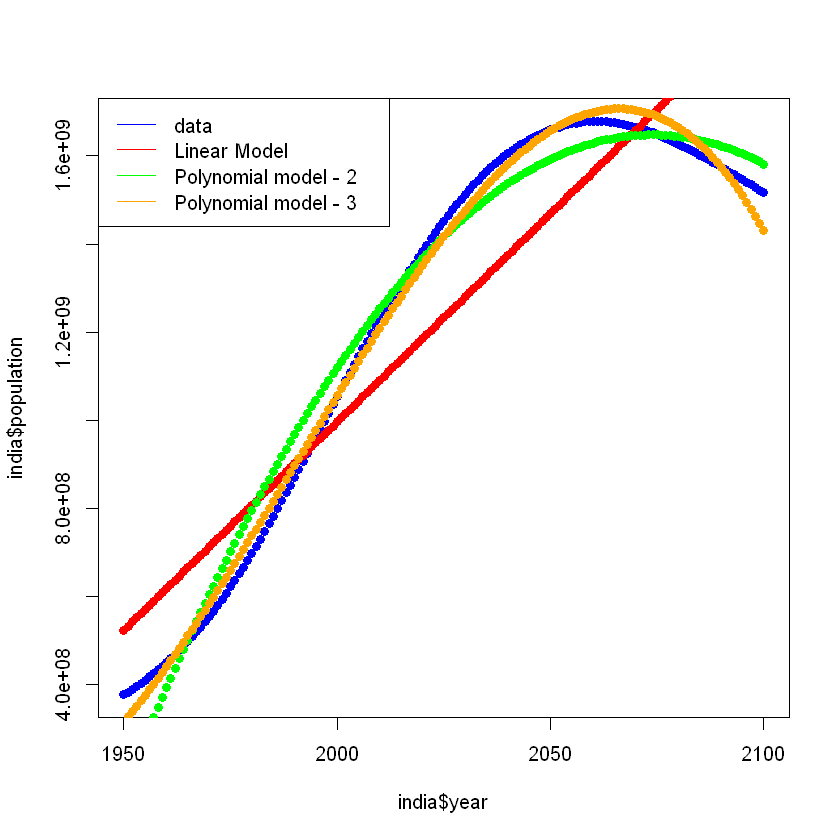

In [54]:
# build the models
model_lin    = lm ( india$population ~ india$year )
model_poly_2 = lm ( india$population ~ india$year + I(india$year ^ 2))
model_poly_3 = lm ( india$population ~ india$year + I(india$year ^ 2) + I(india$year ^ 3))

# fit line.
pred_lin    = predict(model_lin, newdata = india)
pred_poly_2 = predict(model_poly_2, newdata = india) 
pred_poly_3 = predict(model_poly_3, newdata = india) 

# scatter plot
plot(india$year,india$population, pch=19, col= "blue")
points (india$year, pred_lin, pch=19, col= "red")
points (india$year, pred_poly_2, pch = 19, col = "green")
points (india$year, pred_poly_3, pch = 19, col = "orange")

#put a legend as well. 
legend("topleft", legend=c("data", "Linear Model", "Polynomial model - 2", "Polynomial model - 3"),
       col=c("blue", "red", "green", "orange"), lty=1)

Essentiall, we are doing this now. 

The original linear equation <br> $y = a x_1 + b$ <br> has been transformed to <br> $y = 1 + a_1 x_1 + a_2 x_1^2 + a_3 x_1^3 + b$

The orange line (polynomial fit, degree = 3) is hugging the actual data curve (blue) much closer than the green line ( polynomial fit , degree = 2 ), right ? Let's do the numbers ( r<sup>2</sup> score ) as well, to really know the degree of fit. 

In [53]:
cat ( summary(model_lin)$r.squared, " --> R squared - Linear fit", "\n")
cat ( summary(model_poly_2)$r.squared, " --> R squared - polynomial fit ( degree = 2)", "\n")
cat ( summary(model_poly_3)$r.squared, " --> R squared - polynomial fit ( degree = 3)", "\n")

0.8434444  --> R squared - Linear fit 
0.9776831  --> R squared - polynomial fit ( degree = 2) 
0.9953978  --> R squared - polynomial fit ( degree = 3) 


<hr>

### Challenge

Use polynomial regression to fit the following parameters on the boston Housing dataset. 
- LSTAT ( Lower Status Population percentage )
- MEDV  ( Median house value )

After modeling , 
- Plot both linear and polynomial model ( degree = 2 ) to visually show how they perform
- Compare the r<sup>2</sup>  values between linear and polynomial model
- Verify if increasing the degree of the polynomial regression ( say degree = 3 or 4 ) increases the performance. 

### Solution

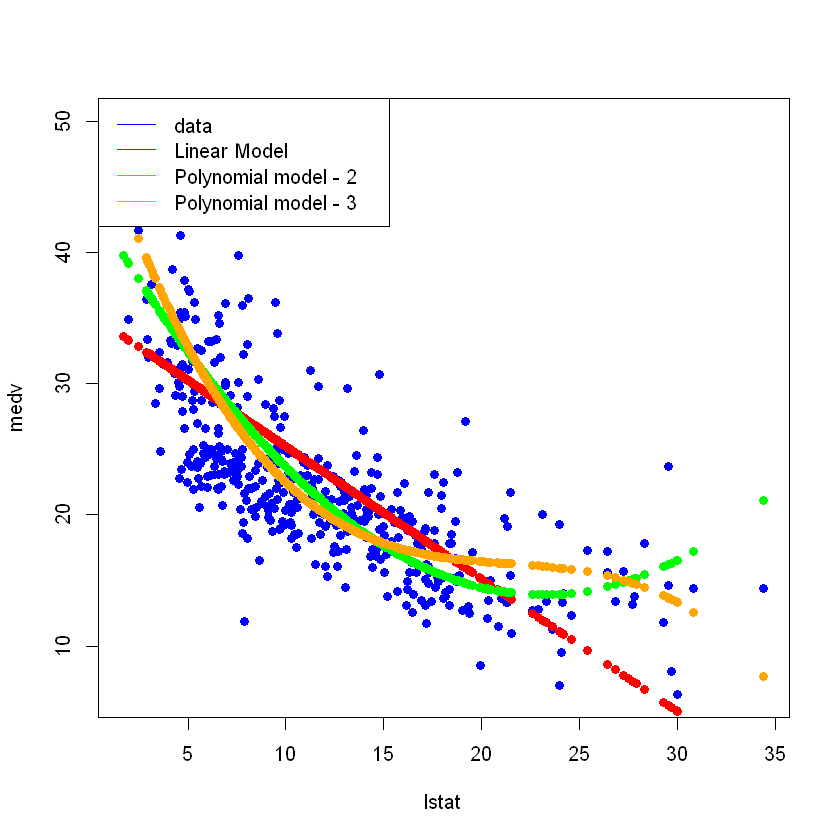

In [76]:
# build the models
model_lin    = lm ( medv ~ lstat , data = boston_housing)
model_poly_2 = lm ( medv ~ lstat + I(lstat ^ 2), data = boston_housing)
model_poly_3 = lm ( medv ~ lstat + I(lstat ^ 2) + I(lstat ^ 3), data = boston_housing)

# fit line.
pred_lin    = predict(model_lin, newdata = boston_housing)
pred_poly_2 = predict(model_poly_2, newdata = boston_housing) 
pred_poly_3 = predict(model_poly_3, newdata = boston_housing) 

# scatter plot
lstat = boston_housing$lstat
medv  = boston_housing$medv

plot   (lstat,medv, pch=19, col= "blue")
points (lstat, pred_lin,  , pch=19, col= "red")
points (lstat, pred_poly_2, pch = 19, col = "green")
points (lstat, pred_poly_3, pch = 19, col = "orange")

#put a legend as well. 
legend("topleft", legend=c("data", "Linear Model", "Polynomial model - 2", "Polynomial model - 3"),
       col=c("blue", "red", "green", "orange"), lty=1)

**0.544** - r2 score with linear modeling <br>
**0.640** - r2 score with polynomial modeling ( degree = 2 ) <br>
**0.657** - r2 score with polynomial modeling ( degree = 3 )

That's just a marginal improvement over second degree polynomial regression. So, you don't need to go beyond second degree.

How about a 10th degree fit ? 

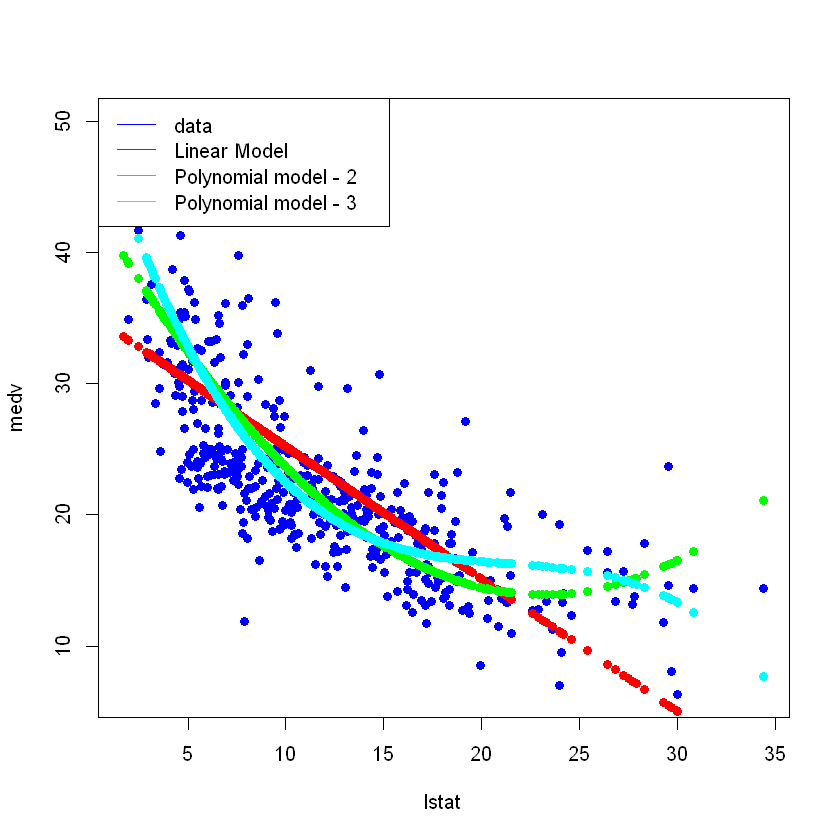

In [79]:
# build the models
model_lin    = lm ( medv ~ lstat , data = boston_housing)
model_poly_2 = lm ( medv ~ lstat + I(lstat ^ 2), data = boston_housing)
model_poly_3 = lm ( medv ~ lstat + I(lstat ^ 2) + I(lstat ^ 3), data = boston_housing)
# notice how we are specifying the polynomial fit
model_poly_10 = lm ( medv ~ poly(lstat,10), data = boston_housing)

# fit line.
pred_lin    = predict(model_lin, newdata = boston_housing)
pred_poly_2 = predict(model_poly_2, newdata = boston_housing) 
pred_poly_3 = predict(model_poly_3, newdata = boston_housing) 
pred_poly_10 = predict(model_poly_3, newdata = boston_housing) 

# scatter plot
lstat = boston_housing$lstat
medv  = boston_housing$medv

plot   (lstat,medv, pch=19, col= "blue")
points (lstat, pred_lin,  , pch=19, col= "red")
points (lstat, pred_poly_2, pch = 19, col = "green")
points (lstat, pred_poly_3, pch = 19, col = "orange")
points (lstat, pred_poly_10, pch = 19, col = "cyan")

#put a legend as well. 
legend("topleft", legend=c("data", "Linear Model", "Polynomial model - 2", "Polynomial model - 3"),
       col=c("blue", "red", "green", "orange"), lty=1)

**0.544** - r2 score with linear modeling <br>
**0.640** - r2 score with polynomial modeling ( degree = 2 ) <br>
**0.657** - r2 score with polynomial modeling ( degree = 3 ) <br>
**0.684** - r2 score with polynomial modeling ( degree = 10 ) <br>

See, even if you go to a 10th degree polynomial fitting, the improvement in r<sup>2</sup> is just about 0.04 from a second degree polynomial fitting. 

<hr>

## Overfitting

Sometimes, where there is not enough data, the model might tend to overfit. Look at the example data below. We are simulating a sin wave.

In [104]:
x = seq( from = 10, to = 100, by=5)
y = sin(x*pi/180)

Let's plot it to see how it it looks 

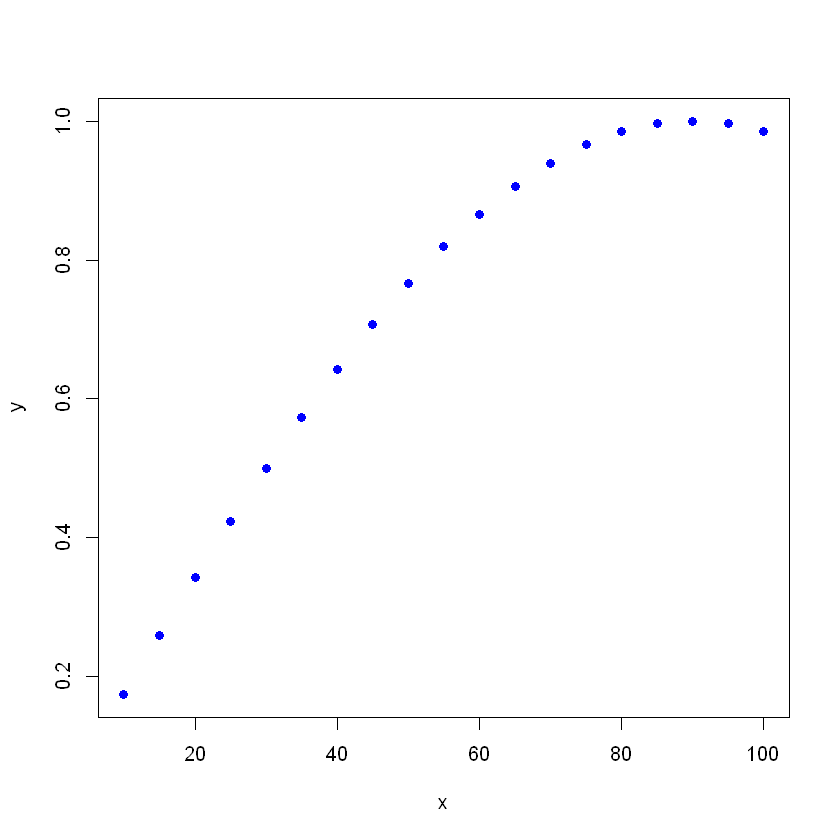

In [87]:
plot(x,y, pch = 19, col = "blue")

Let's introduce a bit of variance to make the data a bit realistic. 

In [105]:
variance = runif(length(x), min=0.1, max=0.3)
y = y + variance

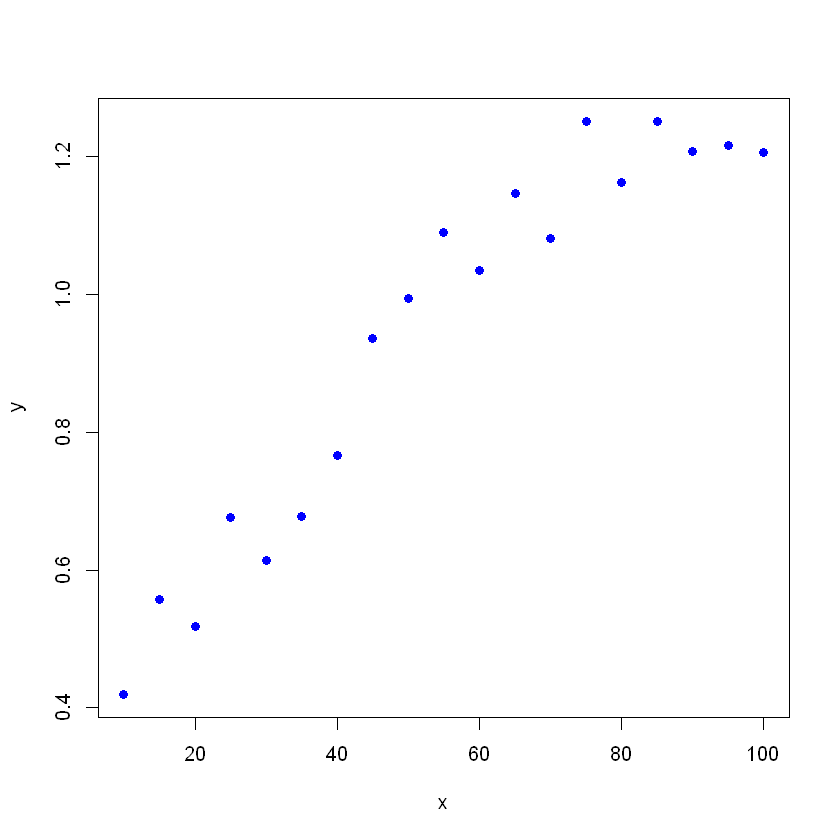

In [106]:
plot(x,y, pch = 19, col = "blue")

Now,  let's see how a 2nd degree polynomial regression fits. 

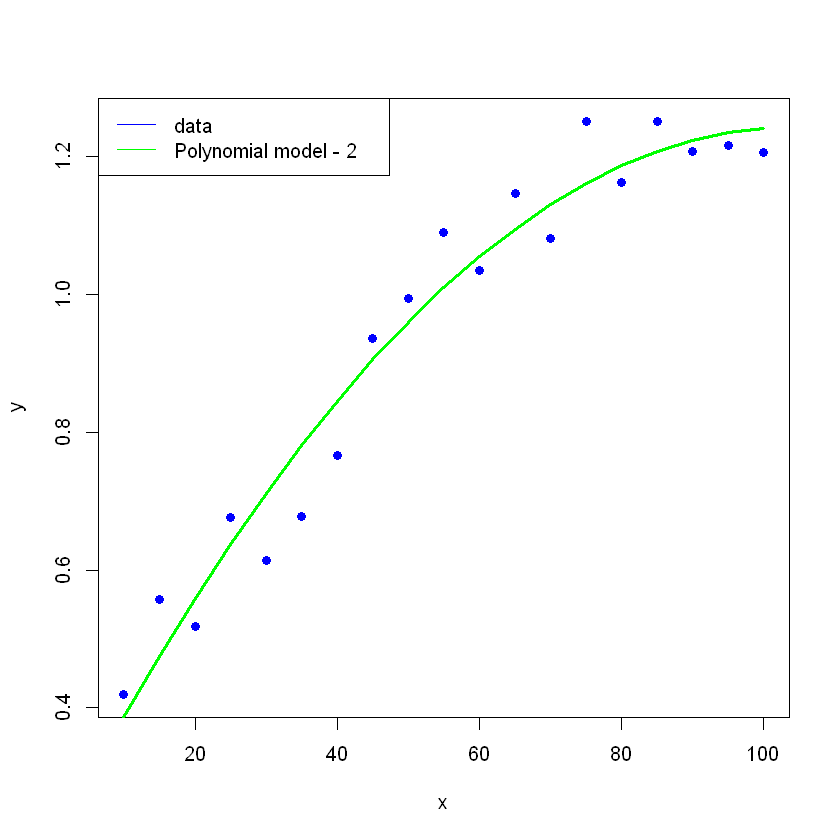

In [116]:
# build the models
model_poly_2 = lm ( y ~ x + I(x ^ 2))

# fit line.
pred_poly_2 = predict(model_poly_2, newdata = data.frame(x,y)) 

# scatter plot
plot   (x,y, pch=19, col= "blue")
lines (x, pred_poly_2, pch = 19, col = "green", lty=1, lwd = 3)

#put a legend as well. 
legend("topleft", legend=c("data", "Polynomial model - 2"),
       col=c("blue", "green"), lty=1)

This looks to be a good fit, right ? Now, let's try a higher order polynomial fit ( say degree = 10 )

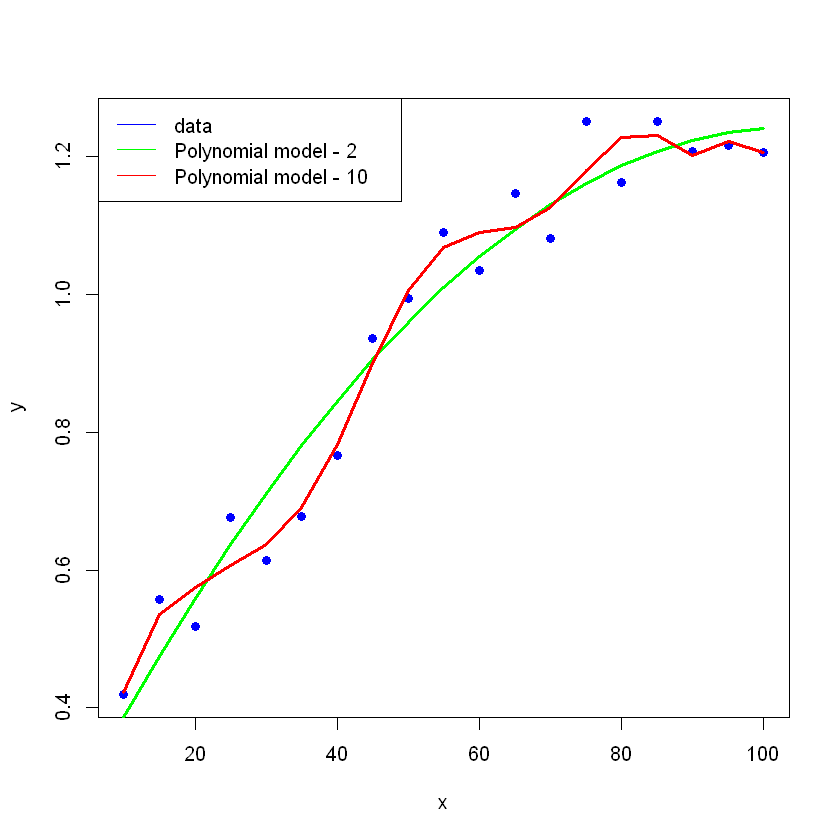

In [120]:
# build the models
model_poly_2 = lm ( y ~ x + I(x ^ 2))
model_poly_10 = lm ( y ~ poly(x,10))

# fit line.
pred_poly_2 = predict(model_poly_2, newdata = data.frame(x,y)) 
pred_poly_10 = predict(model_poly_10, newdata = data.frame(x,y)) 

# scatter plot
plot   (x,y, pch=19, col= "blue")
lines (x, pred_poly_2, pch = 19, col = "green", lty=1, lwd = 3)
lines (x, pred_poly_10, pch = 19, col = "red", lty=1, lwd = 3)

#put a legend as well. 
legend("topleft", legend=c("data", "Polynomial model - 2", "Polynomial model - 10"),
       col=c("blue", "green", "red"), lty=1)

Overfitting typically happens when the model is trying to work too hard for the data. And why is it a problem ? Overfitting tries to fit the data too much and hence will not work well for new datasets. Think of overfitting as localizing the solution for the test datasets - it is more or less **memorizing** the data, not **generalizing** a solution for the dataset. Obviously, it will not work as well when model is used on real data set. We will see more examples of these when we see other machine learning algorithms down the line. 

If you are wondering why the simple linear regression is able to learn the model just enough, but the higher degree polynomial regression is over learning it, that is because the higher order polynomial regression has the flexibility to learn more ( as compared to a linear or second order polynomial regression ). This is actually, good, except that it is not able to discern noise from data. Let's increase the dataset size to see if the same 15 degree polynomial regression peforms better than a second order. 

**Increase sample size to 1000**

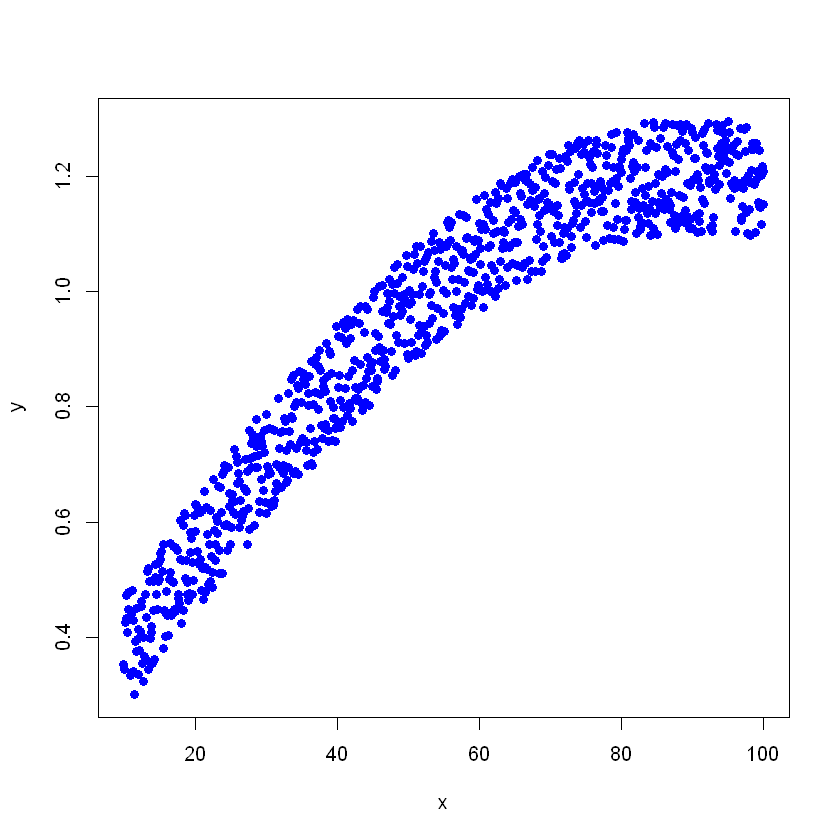

In [136]:
x = seq( from = 10, to = 100, by=0.1)
y = sin(x*pi/180)

variance = runif(length(x), min=0.1, max=0.3)
y = y + variance

plot(x,y, pch = 19, col = "blue")

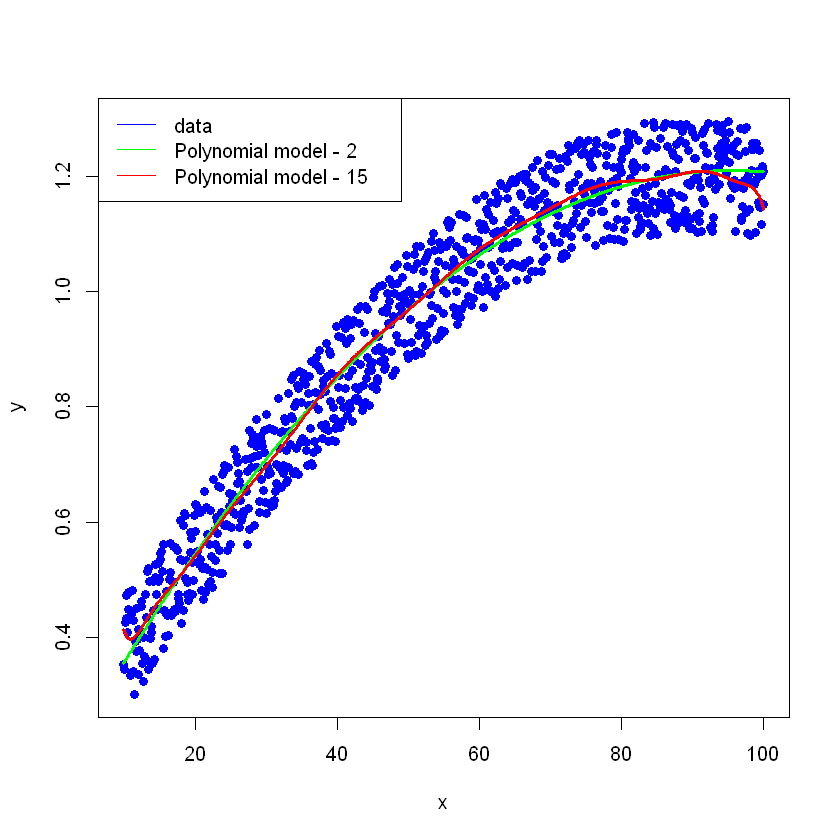

In [137]:
# build the models
model_poly_2 = lm ( y ~ x + I(x ^ 2))
model_poly_15 = lm ( y ~ poly(x,15))

# fit line.
pred_poly_2 = predict(model_poly_2, newdata = data.frame(x,y)) 
pred_poly_15 = predict(model_poly_10, newdata = data.frame(x,y)) 

# scatter plot
plot   (x,y, pch=19, col= "blue")
lines (x, pred_poly_2, pch = 19, col = "green", lty=1, lwd = 3)
lines (x, pred_poly_15, pch = 19, col = "red", lty=1, lwd = 3)

#put a legend as well. 
legend("topleft", legend=c("data", "Polynomial model - 2", "Polynomial model - 15"),
       col=c("blue", "green", "red"), lty=1)

You see, data size did not matter, still the 15th order polynomial regression still overfits the data. The reason is that for the amount of data and noise, a second or 3rd degree polynomial has enough power to capture the complexity of this data. Probably for more complicated data sets, an increase in degree might capture the complexity better. 

<hr>

### Detect Overfitting

If you look at the pictures above, we were able to clearly see an overfit. This is because it is a 2 dimensional dataset. Most data is multi-dimensional in real life - in which case we cannot be able to identify an overfit, but just looking at a plot. There are basically 2 methods to identify an overfit. 

#### 1. Chose a simpler model.

Look at a measure of the score ( **r<sup>2</sup>**) - if there is not a significant difference, then better go for a simpler model. 

In [140]:
x = seq( from = 10, to = 100, by=0.1)
y = sin(x*pi/180)

variance = runif(length(x), min=0.1, max=0.3)
y = y + variance

# build the models
model_poly_2 = lm ( y ~ x + I(x ^ 2))
model_poly_15 = lm ( y ~ poly(x,15))

# fit line.
pred_poly_2 = predict(model_poly_2, newdata = data.frame(x,y)) 
pred_poly_15 = predict(model_poly_10, newdata = data.frame(x,y)) 

# print out r-squared
print ( summary(model_poly_2)$r.squared)
print ( summary(model_poly_15)$r.squared)

[1] 0.9485446
[1] 0.9504134


<table>
  <tr>
      <th>r<sup>2</sup> score </th>   <th>2<sup>nd</sup> Degree Polynomial</th>    <th>15<sup>th</sup> Degree Polynomial</th>   
  </tr>
    <tr> <td> </td> <td>0.948</td>     <td>0.950</td>     
  </tr>

</table>

The **r<sup>2</sup>** score of the 2<sup>nd</sup> degree fit is almost as better as the 15<sup>th</sup> degree polynomial model. So, the simpler model ( 2<sup>nd</sup> degree model) wins. 

<hr>

#### 2. Check the model performance across Training and Test datasets. 

Another method to identify an overfit is by validating how well the model is performing against the training dataset vs the test dataset. 

In [2]:
# Split the data to train and test

# 1. Get the number of rows 
rows = nrow(boston_housing)

# 2. sample out 80% of the numbers between 1 and the number of rows
index = sample(1:rows, rows*0.8)

# 3. get the training data using the indices that correspond to 80% of the dataset
train = boston_housing[index,]

# 4. The remaining part of the data set becomes the test dataset. 
test = boston_housing[-index,]

Fit a 2nd degree and 15th degree polynomial regression

In [37]:
# build the models
model_lin     = lm ( medv ~ lstat , data = train)
model_poly_2  = lm ( medv ~ lstat + I(lstat ^ 2), data = train)
model_poly_15 = lm ( medv ~ poly(lstat,15), data = train)

Compare the accuracy scores across both the scenarios (2nd degree and 15th degree polynomial regression) by predicting the test data set based on modeling the training dataset. 

In [38]:
mape_2 = mean ( abs ( ( test$medv - predict(model_poly_2, test) ) / test$medv * 100 ) , na.rm = TRUE)
mape_15 = mean ( abs ( ( test$medv - predict(model_poly_15, test) ) / test$medv * 100 ) , na.rm = TRUE)

In [39]:
cat ( mape_2, mape_15)

17.64013 15.44444

As you can see the r-square score has decreased (slightly though ) for the 15th degree polynomial. That goes to show that  the 15th degree polynomial is definitely overfitting. 

<hr>

## Linear Regression Assumptions

### Homoskedasticity

In plain english, what this means is that, the variance between the predicted and the actual values should be uniform across the spectrum.

> **Homoskedasticity** = Uniform Variance

Let's take the relationship between the number of rooms ("RM") and the median price value ("MEDV") and try to fit a linear regression model. 

In [67]:
model_lin     = lm ( medv ~ rm , data = boston_housing)

Let's try to predict the house price now that our model is ready. 

In [68]:
y_pred = predict ( model_lin, newdata = boston_housing)

Now that we have predicted the housing prices, let's see how they compare to the actual house price. The difference between the predicted and actual values is called **residuals**.

In [69]:
residuals_rm = y_pred - boston_housing$medv

Let's plot the residuals vs the predicted values. 

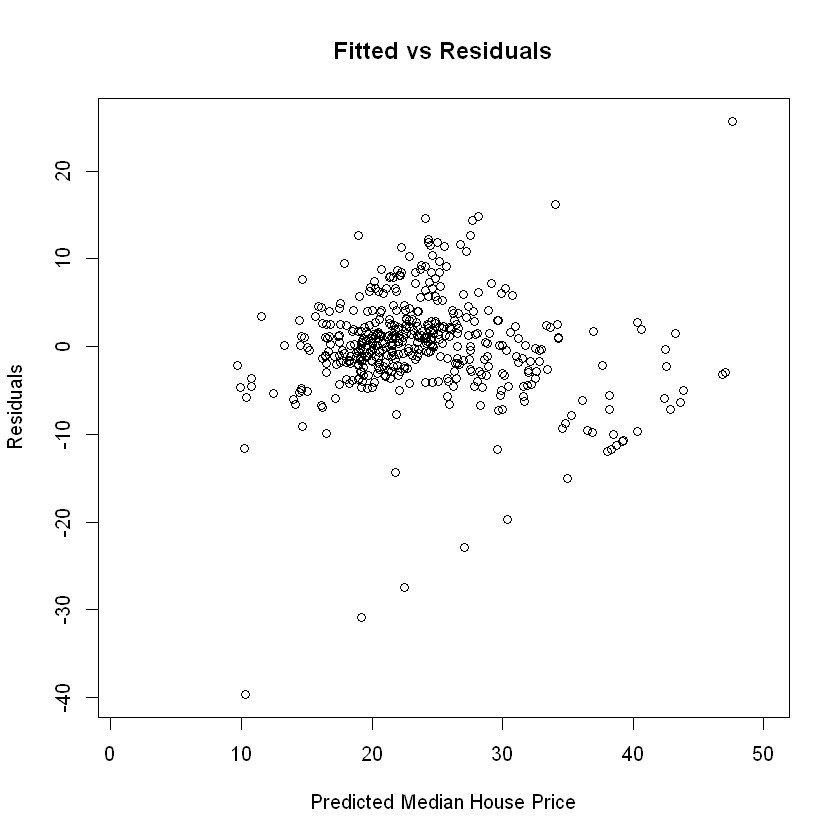

In [54]:
plot ( y_pred, residuals_rm, 
       xlim  = c(1,50),
       xlab  = "Predicted Median House Price",
       ylab  = "Residuals",
       main  = "Fitted vs Residuals")

What this plot goes to show is that the variance ( residuals ) is not uniform across the spectrum of house prices. For example, the variance is high between 10K and 35K. But that's probably because the bulk of the data lies there. You can strip away outliers and restrict our dataset to between those values and try again. 

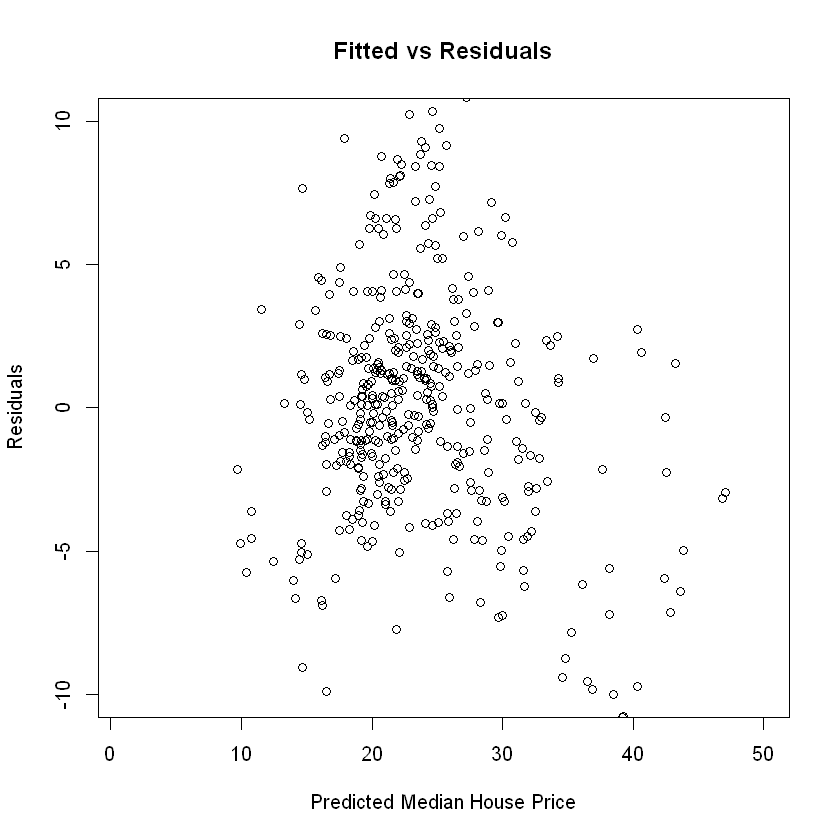

In [55]:
plot ( y_pred, residuals_rm, 
       xlim  = c(1,50),
       ylim  = c(-10,10),
       xlab  = "Predicted Median House Price",
       ylab  = "Residuals",
       main  = "Fitted vs Residuals")

This actually looks ok. However, the ideal scenario is what is called the night sky - like a simulated picture below. 

In [62]:
# Generate 10K random numbers between 0 and 100.
x = runif(100, min = 0, max = 100)
y = runif(100, min = 0, max = 100)

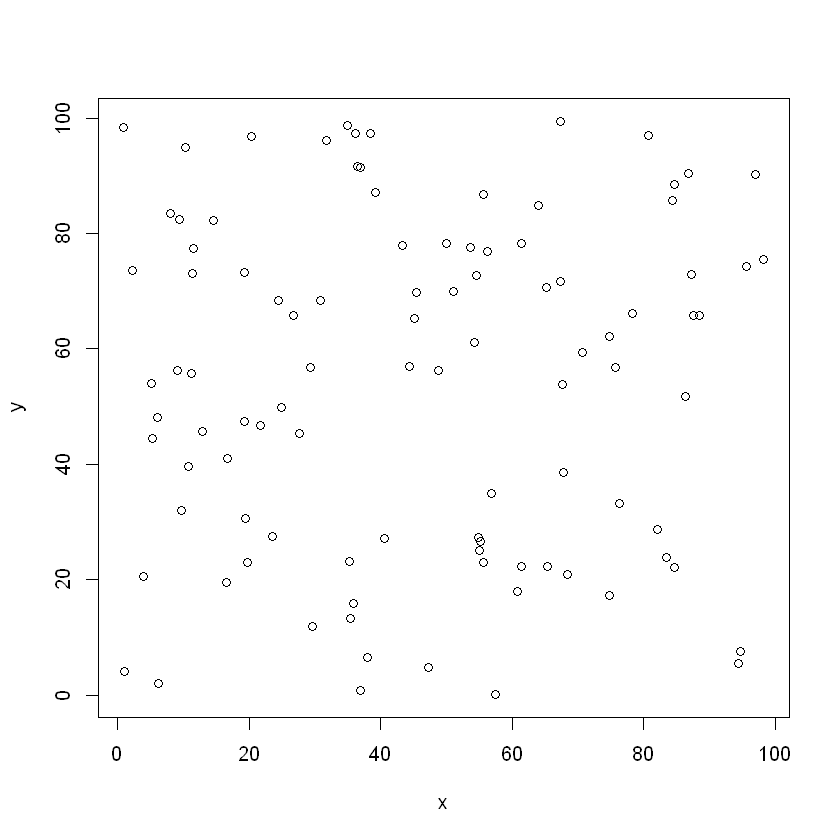

In [63]:
plot(x,y)

What homoskedasticity does is ensure that the prediciteve capacity is uniform across all the entire range of the predictors. 

This is the ideal plot that confirms homeskedasticity - Also called the **Night sky**. If you look at the variance(residuals), they are uniformly distributed across the entire spectrum of house prices. What this means is that we can confidently predict the house price across the entire spectrum with the same level of accuracy. 

Now, compare it to the previous **Fitted vs Residuals** plot to understand it better. 

<img src="./pics/fitted-vs-residuals-ideal.png"/> <img src="./pics/fitted-vs-residuals-rm.png"/>

<hr>

### Normal Distribution of Residuals

Another assumption is that the residuals should be normally distributed. You can quickly verify that using a histogram,

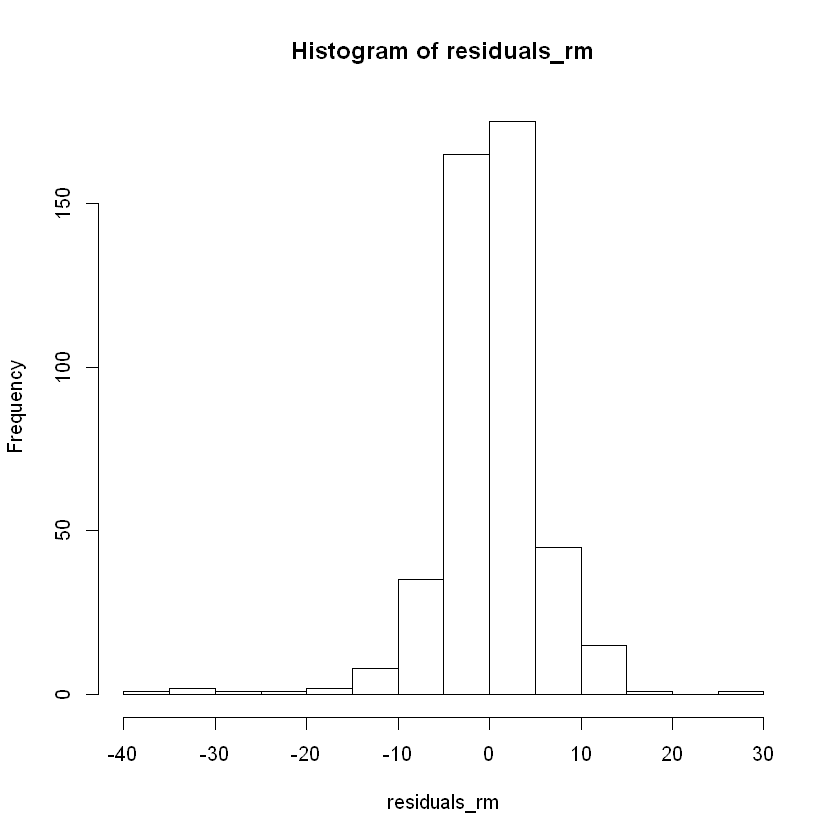

In [70]:
hist(residuals_rm,breaks=20)

This looks almost normal, but a quick quantitative way to compare how much a distribution adheres to a normal distribution is by using a Q-Q plot. Or using a **Q-Q plot**. Q-Q plot is an acronym for **Quantile-Quantile** plot. The way it is calculated is by comparing the quantiles of the sample against the quantiles of a normal distribution. 

[1] 452

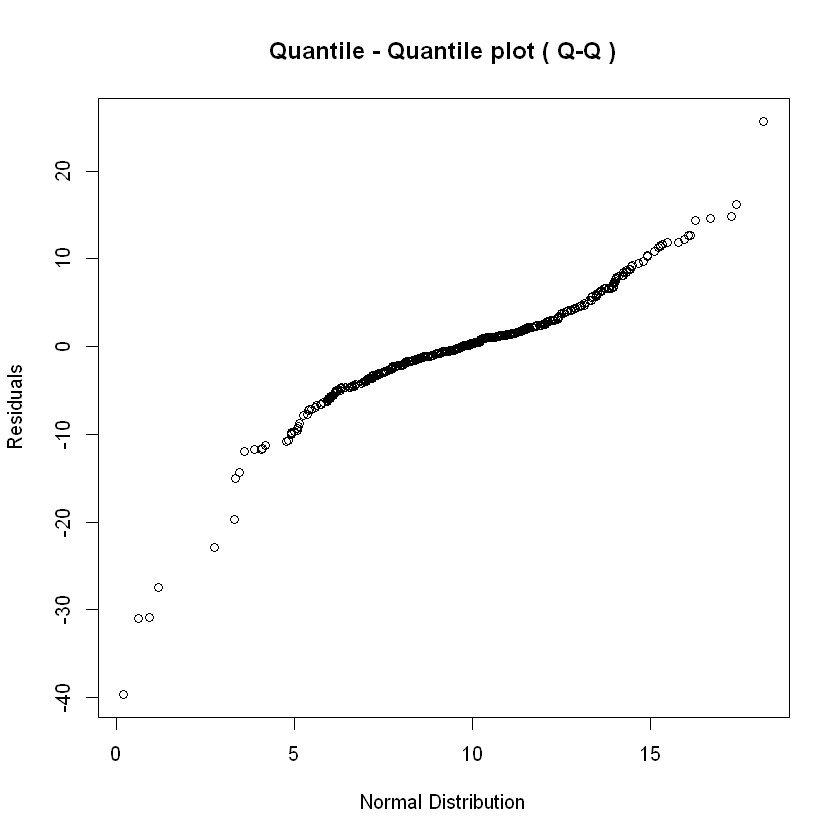

In [76]:
# First sort the residuals ( sample )
residuals_rm_s = sort(residuals_rm)

# How big is the dataset ?
length(residuals_rm_s)

# create a normal distribution as big as the residuals dataset
norm=rnorm(length(residuals_rm_s), mean = 10, sd= 3)

# and sort it
norm_s = sort(norm)

# Scatter plot of normal distribution vs residuals
plot(norm_s,residuals_rm_s,
     main = "Quantile - Quantile plot ( Q-Q )",
     xlab = "Normal Distribution",
     ylab = "Residuals")

What this plot goes to show is that the residuals are almost normally distributed except at the fringes. So, if you can identify the outliers and trim them, this dataset satisfies the **Normal Distribution of Residuals** assumption of Linear Regression. 

<hr>

### No Multicollinearity

Another big word - and the explanation is a bit tricky as well. 

**Multicollinearity**  - If we are trying to predict z from predictors x and y (z ~ x + y), then x and y should have orthogonal predictive power. Meaning, each of them should have independent predictive power. However, if x and y are somehow related, then we have a situation called **multicollinearity**. The predictors should not be able to predict each other. 

Let's create a dummy dataset to understand this better. 

**x** - A normal distribution 
**y** - A slight variation of (with a bit of random variation added to x )

**z** - Another variation of x + y (with a bit of random variation added to x) so that we simulate a relationship between x, y and z 

In [99]:
var = rnorm ( 100, mean = 5, sd= 2)

x = rnorm(100, mean = 100, sd = 10)
y = x +var

var = rnorm ( 100, mean = 5, sd= 2)
z = x + var +y

X = data.frame(x,y,z)

In [100]:
model = lm ( z ~ ., data = X )
summary(model)


Call:
lm(formula = z ~ ., data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9027 -1.2531 -0.0404  1.2897  4.6848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.05493    1.99755   4.533 1.66e-05 ***
x            0.94709    0.09944   9.524 1.43e-15 ***
y            1.01445    0.09687  10.472  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.043 on 97 degrees of freedom
Multiple R-squared:  0.9907,	Adjusted R-squared:  0.9905 
F-statistic:  5176 on 2 and 97 DF,  p-value: < 2.2e-16


As we see, we have a pretty good r<sup>2</sup> because we have modelled the data almost as z = x + y + a bit of variance. Now, let's calculate the VIF of the model.

In [101]:
car::vif(model)

x        y 
26.14254 26.14254

These are basically very high values. Any value above 5 is pretty high in terms of collinearity. What this shows is that the predictors x and y are basically highly dependent on each other (as opposed to their capacity to predict the response variable).

Collinearity is predicted using a parameter called **VIF**, the formula for which is 

$VIF = \frac{1}{1-R_s^2}$

where **R<sub>sq</sub><sup>2</sup>** is the typical **r<sup>2<sup>** of the individual predictor when regressed (predicted) against the rest of the predictors. So, in the example above, **VIF** value of **y** becomes

$VIF_y = \frac{1}{1-R_s^2}$

where **R<sub>sq</sub><sup>2</sup>** is the typical **r<sup>2</sup>** value when you fit the equation

$x = a_2 y + b$

This is in contrast to the actual model $y = a_1 x + a_2 y + b$.

Point being, as long as there is a relationship between the variables, it is displayed with a **VIF** or **Variance Inflation Factor** > 2. Let's tae another example. 

Collinearity and correlation are different though. Look at the picture below. There is some correlation between 

- Total Power Consumption  <--> Number of rooms
- Total Power Consumption  <--> Power consumption per room

But there is a perfect collinearity between 

- Total Power Consumption  <--> Number of rooms & Power consumption/room

<img src="./pics/multicollinearity.png"/>

Correlation is between 2 variables, while collinearity is between a single variable and a combination of variables. 

Now that we understand collinearity, let's find out how many variables have a collinear relationship in the Boston Housing dataset. 

In [103]:
model = lm (  medv ~ ., data = boston_housing )
summary(model)


Call:
lm(formula = medv ~ ., data = boston_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3991  -2.5377  -0.5848   1.7101  27.9916 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  20.866365   5.477190   3.810 0.000159 ***
crim         -0.238025   0.223853  -1.063 0.288229    
zn            0.038221   0.013372   2.858 0.004462 ** 
indus         0.051356   0.059643   0.861 0.389683    
chas          2.435048   0.829794   2.935 0.003516 ** 
nox         -11.657986   3.928009  -2.968 0.003163 ** 
rm            5.110158   0.454838  11.235  < 2e-16 ***
age          -0.006094   0.013101  -0.465 0.642031    
dis          -1.271514   0.195766  -6.495 2.26e-10 ***
rad           0.294444   0.085387   3.448 0.000619 ***
tax          -0.011360   0.003612  -3.145 0.001776 ** 
ptratio      -0.831030   0.127000  -6.544 1.68e-10 ***
b             0.012314   0.003513   3.505 0.000503 ***
lstat        -0.520753   0.057428  -9.068  < 2e-16 ***
---

In [116]:
for ( name in names(car::vif(model)) ) {
    cat ( name ,car::vif(model)[name], "\n")
}

crim 6.791148 
zn 2.30185 
indus 3.575504 
chas 1.07249 
nox 4.348241 
rm 2.001147 
age 2.95385 
dis 3.643646 
rad 9.025998 
tax 6.501212 
ptratio 1.698408 
b 1.261811 
lstat 2.719365 


So, all of the following variables have a high collinearity. 

- 9  - VIF for  RAD
- 6.5  - VIF for  TAX

<hr>

#### How to fix Collinearity?

- Iteratively remove the predictor with the highest VIF. So, in this case, remove either TAX or PTRATIO and do a re-run. 
- Use dimentionality reduction ( say PCA ) to reduce the number of predictors ( More on PCA & dimensionality reduction later)

In [171]:
for i in range(1,13) :
    vif = variance_inflation_factor(data,i)
    print ( vif, " - VIF for ",feature_names[i-1])

1.664471491773954  - VIF for  CRIM
2.273018308327798  - VIF for  ZN
3.682264743037106  - VIF for  INDUS
1.0615610963150082  - VIF for  CHAS
4.304929331571053  - VIF for  NOX
1.8854245633324191  - VIF for  RM
3.0830086748912335  - VIF for  AGE
3.954950605693307  - VIF for  DIS
3.4152890003342686  - VIF for  TAX
1.7348731617273456  - VIF for  PTRATIO
1.34145900343612  - VIF for  B
2.9377524102330312  - VIF for  LSTAT


Now, all the variables have a VIF of less than 5 ( Less than 2 or 3 is ideal though )